# Import Modules

In [94]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException

from webdriver_manager.chrome import ChromeDriverManager

import time
import random

from urllib.parse import urljoin, urlparse

from collections import defaultdict

import re

from bs4 import BeautifulSoup

In [95]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

# Scrape Races

### Winners

In [31]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish year begin and end
year_begin = 1950
year_end = 2024

# Establish empty lists
race = []
race_url = []
rounds = []
date = []
year = []
winner = []
team = []
laps = []
total_time = []


points = []

while year_begin <= year_end:

    # Use the year being to be able to crawl across season pages
    url = "https://www.formula1.com/en/results/" + str(year_begin) + "/races"
    print(year_begin)
    print(url)
    browser.get(url)
    time.sleep(random.uniform(1, 4))

    r = 1

    # Find the table using the table tag
    table = browser.find_elements(By.TAG_NAME, "table")

    # Find the rows for each tr in the table
    for tr in table:
        rows = tr.find_elements(By.TAG_NAME, "tr")[1:]

        # Find the data in each of the rows and append it to the proper list
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")

            race.append(cells[0].text)
            
            # Url for each specific race
            link = cells[0].find_element(By.TAG_NAME, "a")
            race_url.append(link.get_attribute("href"))
            
            # Append round number
            rounds.append(r)
            r += 1

            date.append(cells[1].text)
            winner.append(cells[2].text)
            team.append(cells[3].text)
            laps.append(cells[4].text)
            total_time.append(cells[5].text)

            year.append(year_begin)
    
    year_begin += 1
    
browser.close()

1950
https://www.formula1.com/en/results/1950/races
1951
https://www.formula1.com/en/results/1951/races
1952
https://www.formula1.com/en/results/1952/races
1953
https://www.formula1.com/en/results/1953/races
1954
https://www.formula1.com/en/results/1954/races
1955
https://www.formula1.com/en/results/1955/races
1956
https://www.formula1.com/en/results/1956/races
1957
https://www.formula1.com/en/results/1957/races
1958
https://www.formula1.com/en/results/1958/races
1959
https://www.formula1.com/en/results/1959/races
1960
https://www.formula1.com/en/results/1960/races
1961
https://www.formula1.com/en/results/1961/races
1962
https://www.formula1.com/en/results/1962/races
1963
https://www.formula1.com/en/results/1963/races
1964
https://www.formula1.com/en/results/1964/races
1965
https://www.formula1.com/en/results/1965/races
1966
https://www.formula1.com/en/results/1966/races
1967
https://www.formula1.com/en/results/1967/races
1968
https://www.formula1.com/en/results/1968/races
1969
https:/

In [33]:
# Turn the lists into a dataframe
races_winner = pd.DataFrame({
    "year": year,
    "race": race,
    "round": rounds,
    "date": date,
    "winner": winner,
    "team_name": team,
    "laps": laps,
    "total_time": total_time,
    "race_url": race_url
})

# Save the scraped dataframe to a csv
races_winner.to_csv("../data/raw/races_winner.csv", encoding="utf-8", index=False)

races_winner.tail()


,year,race,round,date,winner,team_name,laps,total_time,race_url
1123,2024,Mexico,20,27 Oct 2024,Carlos Sainz,Ferrari,71,1:40:55.800,https://www.formula1.com/en/results/2024/races...
1124,2024,Brazil,21,03 Nov 2024,Max Verstappen,Red Bull Racing Honda RBPT,69,2:06:54.430,https://www.formula1.com/en/results/2024/races...
1125,2024,Las Vegas,22,23 Nov 2024,George Russell,Mercedes,50,1:22:05.969,https://www.formula1.com/en/results/2024/races...
1126,2024,Qatar,23,01 Dec 2024,Max Verstappen,Red Bull Racing Honda RBPT,57,1:31:05.323,https://www.formula1.com/en/results/2024/races...
1127,2024,Abu Dhabi,24,08 Dec 2024,Lando Norris,McLaren Mercedes,58,1:26:33.291,https://www.formula1.com/en/results/2024/races...


### Results

In [11]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish empty lists
# Race result
race_urls = []
position = []
driver = []
team = []
laps_completed = []
time_gap = []
points = []

for race_url in races_winner["race_url"]:
    # Establish base url
    base_url = race_url.rsplit("/", 1)[0]

    # Race result url
    url = race_url
    print(url)
    browser.get(url)
    WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.TAG_NAME, "table")))

    # Find the table using the table tag
    table = browser.find_elements(By.TAG_NAME, "table")

    # Find the rows for each tr in the table
    for tr in table:
        rows = tr.find_elements(By.TAG_NAME, "tr")[1:]

        # Find the data in each of the rows and append it to the proper list
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")

            if len(cells) >= 7:
                position.append(cells[0].text)
                driver.append(cells[2].text)
                team.append(cells[3].text)
                laps_completed.append(cells[4].text)
                time_gap.append(cells[5].text)
                points.append(cells[6].text)

                race_urls.append(race_url)

browser.close()

https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
https://www.formula1.com/en/results/1950/races/95/monaco/race-result
https://www.formula1.com/en/results/1950/races/96/indianapolis/race-result
https://www.formula1.com/en/results/1950/races/97/switzerland/race-result
https://www.formula1.com/en/results/1950/races/98/belgium/race-result
https://www.formula1.com/en/results/1950/races/99/france/race-result
https://www.formula1.com/en/results/1950/races/100/italy/race-result
https://www.formula1.com/en/results/1951/races/101/switzerland/race-result
https://www.formula1.com/en/results/1951/races/102/indianapolis/race-result
https://www.formula1.com/en/results/1951/races/103/belgium/race-result
https://www.formula1.com/en/results/1951/races/104/france/race-result
https://www.formula1.com/en/results/1951/races/104/france/race-result
https://www.formula1.com/en/results/1951/races/105/great-britain/race-result
https://www.formula1.com/en/results/1951/races/106/germany/

In [22]:
# Turn the lists into a dataframe
races_results = pd.DataFrame({
    "race_url": race_urls,
    "end_position": position,
    "driver": driver,
    "team_name": team,
    "laps_completed": laps_completed,
    "time_gap": time_gap,
    "points": points
})

# Save the scraped dataframe to a csv
races_results.to_csv("../data/raw/races_results_raw.csv", encoding="utf-8", index=False)

races_results.head()

,race_url,end_position,driver,team_name,laps_completed,time_gap,points
0,https://www.formula1.com/en/results/1950/races...,1,Nino Farina,Alfa Romeo,70,2:13:23.600,9
1,https://www.formula1.com/en/results/1950/races...,2,Luigi Fagioli,Alfa Romeo,70,+2.600s,6
2,https://www.formula1.com/en/results/1950/races...,3,Reg Parnell,Alfa Romeo,70,+52.000s,4
3,https://www.formula1.com/en/results/1950/races...,4,Yves Giraud-Cabantous,Talbot-Lago,68,+2 laps,3
4,https://www.formula1.com/en/results/1950/races...,5,Louis Rosier,Talbot-Lago,68,+2 laps,2


In [20]:
races_results["end_position"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'NC',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       'DQ', 'DNS', 'EX'], dtype=object)

In [29]:
races_results = pd.read_csv("../data/raw/races_results_raw.csv", encoding="utf-8")

# Initialize new columns
end_positions = []
statuses = []
current_position = 1
current_race = None

# Group by each race
for idx, row in races_results.iterrows():
    # Check if its a new race
    if current_race != row["race_url"]:
        current_race = row["race_url"]
        current_position = 1

    pos = row["end_position"]

    try:
        # Try converting to int to valid position
        numeric_pos = int(pos)
        end_positions.append(numeric_pos)
        statuses.append("CLAS")
        current_position = numeric_pos + 1
    except ValueError:
        # Not a number so need to assign position and keep status
        if pos in ["NC", "DQ", "DNS", "EX"]:
            end_positions.append(current_position)
            statuses.append(pos)
            current_position += 1
        else:
            end_positions.append(current_position)
            statuses.append("DNF")
            current_position += 1

# Assign back to dataframe
races_results["end_position2"] = end_positions
races_results["position_status"] = statuses

# Rename columns
races_results.rename(columns={"end_position": "raw_end_position"}, inplace=True)
races_results.rename(columns={"end_position2": "end_position"}, inplace=True)
races_results.head()

,race_url,raw_end_position,driver,team_name,laps_completed,time_gap,points,end_position,position_status
0,https://www.formula1.com/en/results/1950/races...,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS
1,https://www.formula1.com/en/results/1950/races...,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS
2,https://www.formula1.com/en/results/1950/races...,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS
3,https://www.formula1.com/en/results/1950/races...,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS
4,https://www.formula1.com/en/results/1950/races...,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS


In [31]:
# Save the scraped dataframe to a csv
races_results.to_csv("../data/intermediate/races_results.csv", encoding="utf-8", index=False)

races_results.head()

,race_url,raw_end_position,driver,team_name,laps_completed,time_gap,points,end_position,position_status
0,https://www.formula1.com/en/results/1950/races...,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS
1,https://www.formula1.com/en/results/1950/races...,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS
2,https://www.formula1.com/en/results/1950/races...,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS
3,https://www.formula1.com/en/results/1950/races...,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS
4,https://www.formula1.com/en/results/1950/races...,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS


### Fastest Laps

In [45]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish empty lists
# Fastest laps
fastest_lap = [] # 1 or 0
driver = []
race_urls = []

for race_url in races_winner["race_url"]:
    # Establish base url
    base_url = race_url.rsplit("/", 1)[0]

# Fastest lap url
    url = urljoin(base_url + "/", "fastest-laps")
    print(url)
    browser.get(url)
    time.sleep(random.uniform(1, 4))

    # Find the table using the table tag
    table = browser.find_elements(By.TAG_NAME, "table")

    # Find the rows for each tr in the table
    for tr in table:
        rows = tr.find_elements(By.TAG_NAME, "tr")[1:]

        # Find the data in the first row and append it to the list
        if rows:
            row = rows[0]
            cells = row.find_elements(By.TAG_NAME, "td")
            
            driver.append(cells[2].text)
            race_urls.append(race_url)

browser.close()

https://www.formula1.com/en/results/1950/races/94/great-britain/fastest-laps
https://www.formula1.com/en/results/1950/races/95/monaco/fastest-laps
https://www.formula1.com/en/results/1950/races/96/indianapolis/fastest-laps
https://www.formula1.com/en/results/1950/races/97/switzerland/fastest-laps
https://www.formula1.com/en/results/1950/races/98/belgium/fastest-laps
https://www.formula1.com/en/results/1950/races/99/france/fastest-laps
https://www.formula1.com/en/results/1950/races/100/italy/fastest-laps
https://www.formula1.com/en/results/1951/races/101/switzerland/fastest-laps
https://www.formula1.com/en/results/1951/races/102/indianapolis/fastest-laps
https://www.formula1.com/en/results/1951/races/103/belgium/fastest-laps
https://www.formula1.com/en/results/1951/races/104/france/fastest-laps
https://www.formula1.com/en/results/1951/races/104/france/fastest-laps
https://www.formula1.com/en/results/1951/races/105/great-britain/fastest-laps
https://www.formula1.com/en/results/1951/races

In [46]:
# Turn the lists into a dataframe
races_fastest_laps = pd.DataFrame({
    "race_url": race_urls,
    "driver": driver,
    "fastest_lap": 1
})

# Save the scraped dataframe to a csv
races_fastest_laps.to_csv("../data/raw/races_fastest_laps.csv", encoding="utf-8", index=False)

races_fastest_laps.head()

,race_url,driver,fastest_lap
0,https://www.formula1.com/en/results/1950/races...,Nino Farina,1
1,https://www.formula1.com/en/results/1950/races...,Juan Manuel Fangio,1
2,https://www.formula1.com/en/results/1950/races...,Johnnie Parsons,1
3,https://www.formula1.com/en/results/1950/races...,Nino Farina,1
4,https://www.formula1.com/en/results/1950/races...,Nino Farina,1


### Pit Stops

In [92]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish empty lists
# Pit stop summary
pit_count = []
driver = []
race_urls = []

for race_url in races_winner["race_url"]:
    # Establish base url
    base_url = race_url.rsplit("/", 1)[0]
    
    # Pit stop url
    url = urljoin(base_url + "/", "pit-stop-summary")
    print(url)
    browser.get(url)
    time.sleep(random.uniform(1, 2))

    max_pits = defaultdict(int)

    # Find the table using the table tag
    table = browser.find_elements(By.TAG_NAME, "table")

    # Find the rows for each tr in the table
    for tr in table:
        rows = tr.find_elements(By.TAG_NAME, "tr")[1:]

        # Find the data in each of the rows and append it to the proper list
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")

            if len(cells) >= 3:
                pit_number = int(cells[0].text)
                driver_name = cells[2].text

                # Updates max pits for the driver
                max_pits[driver_name] = max(max_pits[driver_name], pit_number)
    
    # Append if data is found
    if max_pits:
        for driver_name, num_pits in max_pits.items():
            driver.append(driver_name)
            pit_count.append(num_pits)
            race_urls.append(race_url)
    else:
        pass

browser.close()

https://www.formula1.com/en/results/1950/races/94/great-britain/pit-stop-summary
https://www.formula1.com/en/results/1950/races/95/monaco/pit-stop-summary
https://www.formula1.com/en/results/1950/races/96/indianapolis/pit-stop-summary
https://www.formula1.com/en/results/1950/races/97/switzerland/pit-stop-summary
https://www.formula1.com/en/results/1950/races/98/belgium/pit-stop-summary
https://www.formula1.com/en/results/1950/races/99/france/pit-stop-summary
https://www.formula1.com/en/results/1950/races/100/italy/pit-stop-summary
https://www.formula1.com/en/results/1951/races/101/switzerland/pit-stop-summary
https://www.formula1.com/en/results/1951/races/102/indianapolis/pit-stop-summary
https://www.formula1.com/en/results/1951/races/103/belgium/pit-stop-summary
https://www.formula1.com/en/results/1951/races/104/france/pit-stop-summary
https://www.formula1.com/en/results/1951/races/104/france/pit-stop-summary
https://www.formula1.com/en/results/1951/races/105/great-britain/pit-stop-su

In [93]:
# Turn the lists into a dataframe
races_pits = pd.DataFrame({
    "pit_count": pit_count,
    "driver": driver,
    "race_url": race_urls
})

# Save the scraped dataframe to a csv
races_pits.to_csv("../data/raw/races_pits.csv", encoding="utf-8", index=False)

races_pits.head()

,pit_count,driver,race_url
0,1,Nelson Piquet,https://www.formula1.com/en/results/1983/races...
1,1,Keke Rosberg,https://www.formula1.com/en/results/1983/races...
2,1,Eddie Cheever,https://www.formula1.com/en/results/1983/races...
3,1,Alain Prost,https://www.formula1.com/en/results/1983/races...
4,1,Nelson Piquet,https://www.formula1.com/en/results/1983/races...


### Start Positions

In [130]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish empty lists
# Starting grid
start_pos = []
driver = []
team = []
qual_time = []
race_urls = []

for race_url in races_winner["race_url"]:
    # Establish base url
    base_url = race_url.rsplit("/", 1)[0]

    # Starting grid url
    url = urljoin(base_url + "/", "starting-grid")
    print(url)
    browser.get(url)
    WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.TAG_NAME, "table")))

    # Find the table using the table tag
    table = browser.find_elements(By.TAG_NAME, "table")

    # Find the rows for each tr in the table
    for tr in table:
        rows = tr.find_elements(By.TAG_NAME, "tr")[1:]

        # Find the data in each of the rows and append it to the proper list
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) >= 5:
                start_pos.append(cells[0].text)
                driver.append(cells[2].text)
                team.append(cells[3].text)
                qual_time.append(cells[4].text)
                race_urls.append(race_url)
            elif len(cells) < 5 and len(cells) > 1:
                start_pos.append(cells[0].text)
                driver.append(cells[2].text)
                team.append(cells[3].text)
                race_urls.append(race_url)

                # Get the target driver
                target_driver = cells[2].text
                print(target_driver)

                # Establish second web browser
                browser_qual = webdriver.Chrome()
                browser_qual.maximize_window()

                # Qualifying url
                url_qual = urljoin(base_url + "/", "qualifying")
                print(url_qual)
                browser_qual.get(url_qual)
                WebDriverWait(browser_qual, 5).until(EC.presence_of_element_located((By.TAG_NAME, "table")))

                # Find the table using the table tag
                table_qual = browser_qual.find_elements(By.TAG_NAME, "table")

                # Find the rows for each tr in the table
                found_time = False
                for tr_qual in table_qual:
                    rows_qual = tr_qual.find_elements(By.TAG_NAME, "tr")[1:]

                    # Find the data in each of the rows and append it to the proper list
                    for row_qual in rows_qual:
                        try:
                            cells_qual = row_qual.find_elements(By.TAG_NAME, "td")
                            current_driver = cells_qual[2].text
                            
                            if current_driver == target_driver:
                                # Try to get qualifying time from Q3, Q2, Q1 in that order
                                if cells_qual[6].text:  # Q3 time
                                    qual_time.append(cells_qual[6].text)
                                    found_time = True
                                    break
                                elif cells_qual[5].text:  # Q2 time
                                    qual_time.append(cells_qual[5].text)
                                    found_time = True
                                    break
                                elif cells_qual[4].text:  # Q1 time
                                    qual_time.append(cells_qual[4].text)
                                    found_time = True
                                    break
                                
                        except Exception as e:
                            print(f"Error processing qualifying row: {e}")
                            break
                
                if not found_time:
                    qual_time.append("Unknown")
                
                browser_qual.close()

browser.close()

https://www.formula1.com/en/results/1950/races/94/great-britain/starting-grid
https://www.formula1.com/en/results/1950/races/95/monaco/starting-grid
https://www.formula1.com/en/results/1950/races/96/indianapolis/starting-grid
https://www.formula1.com/en/results/1950/races/97/switzerland/starting-grid
https://www.formula1.com/en/results/1950/races/98/belgium/starting-grid
https://www.formula1.com/en/results/1950/races/99/france/starting-grid
https://www.formula1.com/en/results/1950/races/100/italy/starting-grid
https://www.formula1.com/en/results/1951/races/101/switzerland/starting-grid
https://www.formula1.com/en/results/1951/races/102/indianapolis/starting-grid
https://www.formula1.com/en/results/1951/races/103/belgium/starting-grid
https://www.formula1.com/en/results/1951/races/104/france/starting-grid
https://www.formula1.com/en/results/1951/races/104/france/starting-grid
https://www.formula1.com/en/results/1951/races/105/great-britain/starting-grid
https://www.formula1.com/en/resul

In [133]:
# Turn the lists into a dataframe
races_start = pd.DataFrame({
    "start_position": start_pos,
    "driver": driver,
    "team_name": team,
    "qualifying_time": qual_time,
    "race_url": race_urls
})

# Save the scraped dataframe to a csv
races_start.to_csv("../data/raw/races_start.csv", encoding="utf-8", index=False)

races_start.head()

,start_position,driver,team_name,qualifying_time,race_url
0,1,Nino Farina,Alfa Romeo,1:50.800,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
1,2,Luigi Fagioli,Alfa Romeo,1:51.000,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
2,3,Juan Manuel Fangio,Alfa Romeo,1:51.000,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
3,4,Reg Parnell,Alfa Romeo,1:52.200,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
4,5,Prince Bira,Maserati,1:52.600,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result


# Scrape Driver Info 

In [291]:
# Establish web browser
browser = webdriver.Chrome()
browser.maximize_window()

# Establish year begin and end
year_begin = 1950
year_end = 2024

# Establish empty lists
year = []
position = []
driver = []
driver_code = []
nationality = []


while year_begin <= year_end:

    # Use the year being to be able to crawl across season pages
    url = "https://www.formula1.com/en/results/" + str(year_begin) + "/drivers"
    print(year_begin)
    print(url)
    browser.get(url)
    WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.TAG_NAME, "table")))

    # Find the table using the table tag
    table = browser.find_element(By.TAG_NAME, "table")
    rows = table.find_elements(By.TAG_NAME, "tr")[1:]

    # Find the data in each of the rows and append it to the proper list
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")

        # Get raw html of driver cell
        driver_cell_html = cells[1].get_attribute("innerHTML")
        soup = BeautifulSoup(driver_cell_html, "html.parser") 
        
        code_tag = soup.select_one("span.tablet\\:hidden")

        # Append N/A if code is blank
        driver_code_val = code_tag.text.strip() if code_tag else "N/A"

        # Append info
        position.append(cells[0].text)
        driver.append(cells[1].text)
        driver_code.append(driver_code_val)
        nationality.append(cells[2].text)
        year.append(year_begin)
    
    year_begin += 1
    
browser.close()

1950
https://www.formula1.com/en/results/1950/drivers
1951
https://www.formula1.com/en/results/1951/drivers
1952
https://www.formula1.com/en/results/1952/drivers
1953
https://www.formula1.com/en/results/1953/drivers
1954
https://www.formula1.com/en/results/1954/drivers
1955
https://www.formula1.com/en/results/1955/drivers
1956
https://www.formula1.com/en/results/1956/drivers
1957
https://www.formula1.com/en/results/1957/drivers
1958
https://www.formula1.com/en/results/1958/drivers
1959
https://www.formula1.com/en/results/1959/drivers
1960
https://www.formula1.com/en/results/1960/drivers
1961
https://www.formula1.com/en/results/1961/drivers
1962
https://www.formula1.com/en/results/1962/drivers
1963
https://www.formula1.com/en/results/1963/drivers
1964
https://www.formula1.com/en/results/1964/drivers
1965
https://www.formula1.com/en/results/1965/drivers
1966
https://www.formula1.com/en/results/1966/drivers
1967
https://www.formula1.com/en/results/1967/drivers
1968
https://www.formula1.co

In [292]:
# Turn the lists into a dataframe
drivers_info = pd.DataFrame({
    "year": year,
    "driver": driver,
    "driver_code": driver_code,
    "nationality": nationality
})

# Save the scraped dataframe to a csv
drivers_info.to_csv("../data/raw/drivers_info.csv", encoding="utf-8", index=False)

drivers_info.tail()

,year,driver,driver_code,nationality
1630,2024,Zhou Guanyu,ZHO,CHN
1631,2024,Liam Lawson,LAW,NZL
1632,2024,Valtteri Bottas,BOT,FIN
1633,2024,Logan Sargeant,SAR,USA
1634,2024,Jack Doohan,DOO,AUS


In [293]:
# Turn the lists into a second dataframe
drivers_info_with_pos = pd.DataFrame({
    "year": year,
    "season_rank": position,
    "driver": driver
})

# Save the scraped dataframe to a csv
drivers_info_with_pos.to_csv("../data/intermediate/drivers_info_with_pos.csv", encoding="utf-8", index=False)

drivers_info_with_pos.tail()

,year,season_rank,driver
1630,2024,20,Zhou Guanyu
1631,2024,21,Liam Lawson
1632,2024,22,Valtteri Bottas
1633,2024,23,Logan Sargeant
1634,2024,24,Jack Doohan


# Load Scraped Data

In [294]:
races_winner = pd.read_csv("../data/raw/races_winner.csv", encoding="utf-8")
races_results = pd.read_csv("../data/intermediate/races_results.csv", encoding="utf-8")
races_fastest_laps = pd.read_csv("../data/raw/races_fastest_laps.csv", encoding="utf-8")
races_pits = pd.read_csv("../data/raw/races_pits.csv", encoding="utf-8")
races_start = pd.read_csv("../data/raw/races_start.csv", encoding="utf-8")
drivers_info = pd.read_csv("../data/raw/drivers_info.csv", encoding="utf-8")

# Fix Dataframe Issues

### Fix Start/Finish Missing Data

In [295]:
print(races_results.shape) 
print(races_start.shape) 

(24963, 9)
(25018, 5)


In [296]:
# Merge with indicator to track presence
merged = pd.merge(
    races_start,
    races_results,
    on=["race_url", "driver"],
    how="left",
    indicator=True
)

missing_finishers = merged[merged["_merge"] == "left_only"]

display(missing_finishers[["race_url", "driver", "team_name_x", "start_position"]]) # Show drivers that started but didn't finish


,race_url,driver,team_name_x,start_position
38,https://www.formula1.com/en/results/1950/races/95/monaco/race-result,Alfredo Pián,Maserati,18
152,https://www.formula1.com/en/results/1950/races/100/italy/race-result,Felice Bonetto,Maserati,23
378,https://www.formula1.com/en/results/1951/races/107/italy/race-result,Reg Parnell,BRM,8
380,https://www.formula1.com/en/results/1951/races/107/italy/race-result,Ken Richardson,BRM,10
410,https://www.formula1.com/en/results/1951/races/108/spain/race-result,Juan Jover,Maserati,18
...,...,...,...,...
17907,https://www.formula1.com/en/results/2007/races/813/canada/race-result,Felipe Massa,Ferrari,5
17911,https://www.formula1.com/en/results/2007/races/813/canada/race-result,Giancarlo Fisichella,Renault,9
18117,https://www.formula1.com/en/results/2007/races/822/japan/race-result,Alexander Wurz,Williams Toyota,18
18175,https://www.formula1.com/en/results/2008/races/825/australia/race-result,Rubens Barrichello,Honda,10


In [297]:
extra_finishers = pd.merge(
    races_results,
    races_start,
    on=["race_url", "driver"],
    how="left",
    indicator=True
)

extra_finishers = extra_finishers[extra_finishers["_merge"] == "left_only"]

display(extra_finishers[["race_url", "driver", "team_name_x", "raw_end_position"]]) #  Show drivers that finished but didn't start

,race_url,driver,team_name_x,raw_end_position
10,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,Brian Shawe-Taylor,Maserati,10
21,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,Tony Rolt,ERA,NC
71,https://www.formula1.com/en/results/1950/races/96/indianapolis/race-result,Bill Cantrell,Adams Offenhauser,27
181,https://www.formula1.com/en/results/1951/races/102/indianapolis/race-result,Manny Ayulo,Kurtis Kraft Offenhauser,3
500,https://www.formula1.com/en/results/1952/races/112/france/race-result,Peter Hirt,Ferrari,11
...,...,...,...,...
23937,https://www.formula1.com/en/results/2022/races/1115/austria/race-result,Valtteri Bottas,Alfa Romeo Ferrari,11
24084,https://www.formula1.com/en/results/2022/races/1134/japan/race-result,Pierre Gasly,AlphaTauri RBPT,18
24211,https://www.formula1.com/en/results/2023/races/1143/australia/race-result,Sergio Perez,Red Bull Racing Honda RBPT,5
24217,https://www.formula1.com/en/results/2023/races/1143/australia/race-result,Valtteri Bottas,Alfa Romeo Ferrari,11


In [298]:
# Insert missing finishers
for _, row in missing_finishers.iterrows():
    races_results = pd.concat([
        races_results,
        pd.DataFrame([{
            "race_url": row["race_url"],
            "raw_end_position": "DNF",
            "driver": row["driver"],
            "team_name": row["team_name_x"],
            "laps_completed": "0",
            "time_gap": "N/A",
            "points": "0",
            "end_position": "LAST",
            "position_status": "DNF"
        }])
    ], ignore_index=True)

# Group by race_url and get max numeric position for each race
max_positions = races_results.groupby("race_url").agg(max_pos=("end_position", lambda x: pd.to_numeric(x, errors="coerce").max())).reset_index()

# Merge max positions back to main dataframe
races_results = races_results.merge(max_positions, on="race_url", how="left")

# Replace LAST with max_pos + 1 
races_results.loc[races_results["end_position"] == "LAST", "end_position"] = (races_results["max_pos"] + 1).astype(str)

# Drop the temporary max_pos column
races_results = races_results.drop("max_pos", axis=1)

# Insert missing starters
for _, row in extra_finishers.iterrows():
    races_start = pd.concat([
        races_start,
        pd.DataFrame([{
            "start_position": "LAST",
            "driver": row["driver"],
            "team_name": row["team_name_x"],
            "qualifying_time": "Unknown",
            "race_url": row["race_url"]
        }])
    ], ignore_index=True)

# Group by race_url and get max numeric position for each race
max_positions = races_start.groupby("race_url").agg(max_pos=("start_position", lambda x: pd.to_numeric(x, errors="coerce").max())).reset_index()

# Merge max positions back to main dataframe
races_start = races_start.merge(max_positions, on="race_url", how="left")

# Replace LAST with max_pos + 1 
races_start.loc[races_start["start_position"] == "LAST", "start_position"] = (races_start["max_pos"] + 1).astype(str)

# Drop the temporary max_pos column
races_start = races_start.drop("max_pos", axis=1)

In [299]:
print(races_results.shape) # 25256
print(races_start.shape) # 25162

(25256, 9)
(25162, 5)


In [300]:
# Duplicated rows
print(races_results.duplicated(subset=["race_url", "driver"]).sum()) # 155
print(races_start.duplicated(subset=["race_url", "driver"]).sum()) # 61

155
61


Some racers have multiple rows for some reason. Some finish 11 but also have "NC". This code keeps the best result (ie 11th) and removes the other

In [301]:
# Resolve duplicates for the races_results dataframe
def resolve_duplicates(group):
    if len(group) == 1:
        return group

    # Filter for valid finishes (i.e. not in the non-finish list)
    valid_positions = group[~group["end_position"].isin(["DNF", "NC", "DQ", "DNS", "EX"])]
    if not valid_positions.empty:
        return valid_positions.head(1)  # Keep first valid finish

    # If all are non-finishes, just keep the first one
    return group.head(1)

dup_drivers = races_results[races_results.duplicated(subset=["race_url", "driver"], keep=False)]
before_shape = races_results.shape
cleaned_results = dup_drivers.groupby(["race_url", "driver"]).apply(resolve_duplicates).reset_index(drop=True)

# Drop the duplicates from original and replace with cleaned
races_results = pd.concat([
    races_results.drop(dup_drivers.index),
    cleaned_results
], ignore_index=True)
after_shape = races_results.shape
print(f"Dropped {before_shape[0] - after_shape[0]} rows from races_results dataframe") # 154 rows


# Resolve duplicates for the races_start dataframe
def resolve_start_duplicates(group):
    if len(group) == 1:
        return group
    
    # Prefer the row with a numeric start_position (i.e., not "Unknown")
    numeric_starts = group[group["start_position"].apply(lambda x: str(x).isdigit())]
    
    if not numeric_starts.empty:
        return numeric_starts.head(1)
    
    # If all start_positions are "Unknown" or non-numeric, just take the first
    return group.head(1)

dup_starts = races_start[races_start.duplicated(subset=["race_url", "driver"], keep=False)]
before_shape = races_start.shape
cleaned_starts = dup_starts.groupby(["race_url", "driver"]).apply(resolve_start_duplicates).reset_index(drop=True)

# Drop the duplicates from original and replace with cleaned
races_start = pd.concat([
    races_start.drop(dup_starts.index),
    cleaned_starts
], ignore_index=True)
after_shape = races_start.shape
print(f"Dropped {before_shape[0] - after_shape[0]} rows from races_starts dataframe") # 60 rows

Dropped 155 rows from races_results dataframe
Dropped 61 rows from races_starts dataframe


C:\Users\jackw\AppData\Local\Temp\ipykernel_9612\1761530988.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_results = dup_drivers.groupby(["race_url", "driver"]).apply(resolve_duplicates).reset_index(drop=True)
C:\Users\jackw\AppData\Local\Temp\ipykernel_9612\1761530988.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_starts = dup_starts.groupby(["race_url", "driver"]).apply(resolve

In [302]:
print(races_results.shape)
print(races_start.shape)
# Have equal rows now 25101

(25101, 9)
(25101, 5)


In [303]:
# Duplicated rows (0)
print(races_results.duplicated(subset=["race_url", "driver"]).sum())
print(races_start.duplicated(subset=["race_url", "driver"]).sum())

0
0


### Fix Race Winner Duplicates

In [304]:
display(races_winner[races_winner["race_url"].duplicated(keep=False)]) # These are shared car race winners

,year,race,round,date,winner,team_name,laps,total_time,race_url
10,1951,France,4,01 Jul 1951,Juan Manuel Fangio,Alfa Romeo,77.0,3:22:11.000,https://www.formula1.com/en/results/1951/races/104/france/race-result
11,1951,France,5,01 Jul 1951,Luigi Fagioli,Alfa Romeo,NaN,NaN,https://www.formula1.com/en/results/1951/races/104/france/race-result
49,1956,Argentina,1,22 Jan 1956,Luigi Musso,Ferrari,NaN,NaN,https://www.formula1.com/en/results/1956/races/142/argentina/race-result
50,1956,Argentina,2,22 Jan 1956,Juan Manuel Fangio,Ferrari,98.0,3:00:03.700,https://www.formula1.com/en/results/1956/races/142/argentina/race-result
62,1957,Great Britain,5,20 Jul 1957,Tony Brooks,Vanwall,NaN,NaN,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result
63,1957,Great Britain,6,20 Jul 1957,Stirling Moss,Vanwall,90.0,3:06:37.800,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result


In [305]:
# Update shared car race winners to include both drivers
races_winner.loc[10, "winner"] = "Juan Manuel Fangio / Luigi Fagioli"
races_winner.loc[50, "winner"] = "Juan Manuel Fangio / Luigi Musso" 
races_winner.loc[63, "winner"] = "Stirling Moss / Tony Brooks"

In [306]:
index_to_drop = [11, 49, 62]
races_winner.drop(index_to_drop, inplace=True)

In [307]:
races_winner.loc[races_winner["year"] == 1951]

,year,race,round,date,winner,team_name,laps,total_time,race_url
7,1951,Switzerland,1,27 May 1951,Juan Manuel Fangio,Alfa Romeo,42.0,2:07:53.640,https://www.formula1.com/en/results/1951/races/101/switzerland/race-result
8,1951,Indianapolis,2,30 May 1951,Lee Wallard,Kurtis Kraft Offenhauser,200.0,3:57:38.050,https://www.formula1.com/en/results/1951/races/102/indianapolis/race-result
9,1951,Belgium,3,17 Jun 1951,Nino Farina,Alfa Romeo,36.0,2:45:46.200,https://www.formula1.com/en/results/1951/races/103/belgium/race-result
10,1951,France,4,01 Jul 1951,Juan Manuel Fangio / Luigi Fagioli,Alfa Romeo,77.0,3:22:11.000,https://www.formula1.com/en/results/1951/races/104/france/race-result
12,1951,Great Britain,6,14 Jul 1951,Jose Froilan Gonzalez,Ferrari,90.0,2:42:18.200,https://www.formula1.com/en/results/1951/races/105/great-britain/race-result
13,1951,Germany,7,29 Jul 1951,Alberto Ascari,Ferrari,20.0,3:23:03.300,https://www.formula1.com/en/results/1951/races/106/germany/race-result
14,1951,Italy,8,16 Sep 1951,Alberto Ascari,Ferrari,80.0,2:42:39.300,https://www.formula1.com/en/results/1951/races/107/italy/race-result
15,1951,Spain,9,28 Oct 1951,Juan Manuel Fangio,Alfa Romeo,70.0,2:46:54.100,https://www.formula1.com/en/results/1951/races/108/spain/race-result


In [308]:
races_winner.loc[12:15, "round"] = races_winner.loc[12:15, "round"] - 1 # Fix round numbers for 1951
races_winner.loc[50:57, "round"] = races_winner.loc[50:57, "round"] - 1 # Fix round numbers for 1956
races_winner.loc[63:66, "round"] = races_winner.loc[63:66, "round"] - 1 # Fix round numbers for 1957

In [309]:
races_winner.loc[races_winner["year"] == 1951]

,year,race,round,date,winner,team_name,laps,total_time,race_url
7,1951,Switzerland,1,27 May 1951,Juan Manuel Fangio,Alfa Romeo,42.0,2:07:53.640,https://www.formula1.com/en/results/1951/races/101/switzerland/race-result
8,1951,Indianapolis,2,30 May 1951,Lee Wallard,Kurtis Kraft Offenhauser,200.0,3:57:38.050,https://www.formula1.com/en/results/1951/races/102/indianapolis/race-result
9,1951,Belgium,3,17 Jun 1951,Nino Farina,Alfa Romeo,36.0,2:45:46.200,https://www.formula1.com/en/results/1951/races/103/belgium/race-result
10,1951,France,4,01 Jul 1951,Juan Manuel Fangio / Luigi Fagioli,Alfa Romeo,77.0,3:22:11.000,https://www.formula1.com/en/results/1951/races/104/france/race-result
12,1951,Great Britain,5,14 Jul 1951,Jose Froilan Gonzalez,Ferrari,90.0,2:42:18.200,https://www.formula1.com/en/results/1951/races/105/great-britain/race-result
13,1951,Germany,6,29 Jul 1951,Alberto Ascari,Ferrari,20.0,3:23:03.300,https://www.formula1.com/en/results/1951/races/106/germany/race-result
14,1951,Italy,7,16 Sep 1951,Alberto Ascari,Ferrari,80.0,2:42:39.300,https://www.formula1.com/en/results/1951/races/107/italy/race-result
15,1951,Spain,8,28 Oct 1951,Juan Manuel Fangio,Alfa Romeo,70.0,2:46:54.100,https://www.formula1.com/en/results/1951/races/108/spain/race-result


### Fix Fastest Lap Duplicates

In [310]:
display(races_fastest_laps[races_fastest_laps["race_url"].duplicated(keep=False)]) # These are shared car races so I will just keep the ones with data

,race_url,driver,fastest_lap
10,https://www.formula1.com/en/results/1951/races/104/france/race-result,Juan Manuel Fangio,1
11,https://www.formula1.com/en/results/1951/races/104/france/race-result,Juan Manuel Fangio,1
49,https://www.formula1.com/en/results/1956/races/142/argentina/race-result,Juan Manuel Fangio,1
50,https://www.formula1.com/en/results/1956/races/142/argentina/race-result,Juan Manuel Fangio,1
62,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result,Stirling Moss,1
63,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result,Stirling Moss,1


In [311]:
races_fastest_laps.shape

(1125, 3)

In [312]:
races_fastest_laps.drop_duplicates(inplace=True)

In [313]:
races_fastest_laps.shape # Good. Only dropped the 3

(1122, 3)

### Fix Fastest Lap Missing Data

In [314]:
missing_urls = set(races_fastest_laps["race_url"].unique()) - set(races_winner["race_url"].unique())
print("Missing race_urls from df2:", missing_urls)

missing_urls = set(races_winner["race_url"].unique()) - set(races_fastest_laps["race_url"].unique())
print("Missing race_urls from df1:", missing_urls)
# 3 missing entries from races_fastest_laps - 2021 belgium was suspended shortly after start so couldn't find any fastest lap info

Missing race_urls from df2: set()
Missing race_urls from df1: {'https://www.formula1.com/en/results/2023/races/1217/netherlands/race-result', 'https://www.formula1.com/en/results/2021/races/1074/belgium/race-result', 'https://www.formula1.com/en/results/2023/races/1210/monaco/race-result'}


In [315]:
new_data = [
    {"race_url": "https://www.formula1.com/en/results/2023/races/1217/netherlands/race-result", "driver": "Fernando Alonso", "fastest_lap": 1},
    {"race_url": "https://www.formula1.com/en/results/2023/races/1210/monaco/race-result", "driver": "Lewis Hamilton", "fastest_lap": 1}
    ]

# Add new data to dataframe
new_rows = pd.DataFrame(new_data)
races_fastest_laps = pd.concat([races_fastest_laps, new_rows], ignore_index=True)

# Check to make sure theres only 1 url missing (belgium 2021)
missing_urls = set(races_winner["race_url"].unique()) - set(races_fastest_laps["race_url"].unique())
print("Missing race_urls from df1:", missing_urls)

Missing race_urls from df1: {'https://www.formula1.com/en/results/2021/races/1074/belgium/race-result'}


# Merge Dataframes

In [316]:
display(races_results)
display(races_start)
display(races_winner)
display(races_fastest_laps)
display(races_pits)

,race_url,raw_end_position,driver,team_name,laps_completed,time_gap,points,end_position,position_status
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS
...,...,...,...,...,...,...,...,...,...
25096,https://www.formula1.com/en/results/1961/races/192/great-britain/race-result,DQ,Stirling Moss,Ferguson Climax,56.0,DSQ,0.0,19,DQ
25097,https://www.formula1.com/en/results/1961/races/195/united-states/race-result,11,Masten Gregory,Lotus Climax,92.0,+8 laps,0.0,11,CLAS
25098,https://www.formula1.com/en/results/1964/races/223/united-states/race-result,7,Jim Clark,Lotus Climax,102.0,DNF,0.0,7,CLAS
25099,https://www.formula1.com/en/results/1964/races/223/united-states/race-result,7,Mike Spence,Lotus Climax,NaN,SHC,0.0,7,CLAS


,start_position,driver,team_name,qualifying_time,race_url
0,1,Nino Farina,Alfa Romeo,1:50.800,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
1,2,Luigi Fagioli,Alfa Romeo,1:51.000,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
2,3,Juan Manuel Fangio,Alfa Romeo,1:51.000,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
3,4,Reg Parnell,Alfa Romeo,1:52.200,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
4,5,Prince Bira,Maserati,1:52.600,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
...,...,...,...,...,...
25096,15,Roy Salvadori,Cooper Climax,2:07.400,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result
25097,1,Stirling Moss,Vanwall,2:00.200,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result
25098,6,Stuart Lewis-Evans,Vanwall,2:01.200,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result
25099,3,Tony Brooks,Vanwall,2:00.400,https://www.formula1.com/en/results/1957/races/154/great-britain/race-result


,year,race,round,date,winner,team_name,laps,total_time,race_url
0,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result
1,1950,Monaco,2,21 May 1950,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,https://www.formula1.com/en/results/1950/races/95/monaco/race-result
2,1950,Indianapolis,3,30 May 1950,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,https://www.formula1.com/en/results/1950/races/96/indianapolis/race-result
3,1950,Switzerland,4,04 Jun 1950,Nino Farina,Alfa Romeo,42.0,2:02:53.700,https://www.formula1.com/en/results/1950/races/97/switzerland/race-result
4,1950,Belgium,5,18 Jun 1950,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,https://www.formula1.com/en/results/1950/races/98/belgium/race-result
...,...,...,...,...,...,...,...,...,...
1123,2024,Mexico,20,27 Oct 2024,Carlos Sainz,Ferrari,71.0,1:40:55.800,https://www.formula1.com/en/results/2024/races/1248/mexico/race-result
1124,2024,Brazil,21,03 Nov 2024,Max Verstappen,Red Bull Racing Honda RBPT,69.0,2:06:54.430,https://www.formula1.com/en/results/2024/races/1249/brazil/race-result
1125,2024,Las Vegas,22,23 Nov 2024,George Russell,Mercedes,50.0,1:22:05.969,https://www.formula1.com/en/results/2024/races/1250/las-vegas/race-result
1126,2024,Qatar,23,01 Dec 2024,Max Verstappen,Red Bull Racing Honda RBPT,57.0,1:31:05.323,https://www.formula1.com/en/results/2024/races/1251/qatar/race-result


,race_url,driver,fastest_lap
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,Nino Farina,1
1,https://www.formula1.com/en/results/1950/races/95/monaco/race-result,Juan Manuel Fangio,1
2,https://www.formula1.com/en/results/1950/races/96/indianapolis/race-result,Johnnie Parsons,1
3,https://www.formula1.com/en/results/1950/races/97/switzerland/race-result,Nino Farina,1
4,https://www.formula1.com/en/results/1950/races/98/belgium/race-result,Nino Farina,1
...,...,...,...
1119,https://www.formula1.com/en/results/2024/races/1250/las-vegas/race-result,Lando Norris,1
1120,https://www.formula1.com/en/results/2024/races/1251/qatar/race-result,Lando Norris,1
1121,https://www.formula1.com/en/results/2024/races/1252/abu-dhabi/race-result,Kevin Magnussen,1
1122,https://www.formula1.com/en/results/2023/races/1217/netherlands/race-result,Fernando Alonso,1


,pit_count,driver,race_url
0,1,Nelson Piquet,https://www.formula1.com/en/results/1983/races/9/brazil/race-result
1,1,Keke Rosberg,https://www.formula1.com/en/results/1983/races/9/brazil/race-result
2,1,Eddie Cheever,https://www.formula1.com/en/results/1983/races/454/france/race-result
3,1,Alain Prost,https://www.formula1.com/en/results/1983/races/454/france/race-result
4,1,Nelson Piquet,https://www.formula1.com/en/results/1983/races/454/france/race-result
...,...,...,...
10804,1,Carlos Sainz,https://www.formula1.com/en/results/2024/races/1252/abu-dhabi/race-result
10805,1,Lando Norris,https://www.formula1.com/en/results/2024/races/1252/abu-dhabi/race-result
10806,1,George Russell,https://www.formula1.com/en/results/2024/races/1252/abu-dhabi/race-result
10807,1,Max Verstappen,https://www.formula1.com/en/results/2024/races/1252/abu-dhabi/race-result


### Merge races_results -- races_start on [race_url, driver]

In [317]:
races_all_results = pd.merge(races_results, races_start, on=["race_url", "driver"], how="inner")
races_all_results.shape # Still has 25101

(25101, 12)

In [318]:
# Drop team_name_y column
races_all_results = races_all_results.drop(columns=["team_name_y"])

In [319]:
races_all_results.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,qualifying_time
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS,1,1:50.800
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS,2,1:51.000
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS,4,1:52.200
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS,6,1:53.400
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS,9,1:56.000


### Merge races_all_results -- races_pits on [race_url, driver]

In [320]:
races_all_results_pits = pd.merge(races_all_results, races_pits, on=["race_url", "driver"], how="left")
races_all_results_pits.shape

(25101, 12)

In [321]:
races_all_results_pits.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,qualifying_time,pit_count
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS,1,1:50.800,NaN
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS,2,1:51.000,NaN
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS,4,1:52.200,NaN
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS,6,1:53.400,NaN
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS,9,1:56.000,NaN


### Merge races_all_results_pits -- races_winner on [race_url]

In [322]:
races_all_results_pits_winner = pd.merge(races_all_results_pits, races_winner, on=["race_url"], how="left")
races_all_results_pits_winner.shape # Still has 25078 rows

(25101, 20)

In [323]:
races_all_results_pits_winner.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,qualifying_time,pit_count,year,race,round,date,winner,team_name,laps,total_time
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS,1,1:50.800,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS,2,1:51.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS,4,1:52.200,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS,6,1:53.400,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS,9,1:56.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600


### Merge races_all_results_pits_winner -- races_fastest_laps on [race_url, driver]

In [324]:
races_all_results_pits_winner_fl = pd.merge(races_all_results_pits_winner, races_fastest_laps, on=["race_url", "driver"], how="left")
races_all_results_pits_winner_fl.shape # Still has 25078 rows

(25101, 21)

In [325]:
races_all_results_pits_winner_fl.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,qualifying_time,pit_count,year,race,round,date,winner,team_name,laps,total_time,fastest_lap
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS,1,1:50.800,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,1.0
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS,2,1:51.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS,4,1:52.200,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS,6,1:53.400,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS,9,1:56.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN


### Merge races_all_results_pits_winner_fl -- drivers_info on [year, driver]

In [326]:
races_all_results_pits_winner_fl_info = pd.merge(races_all_results_pits_winner_fl, drivers_info, on=["year", "driver"], how="left")
races_all_results_pits_winner_fl_info.shape # Still has 25078 rows

(25101, 23)

In [327]:
races_all_results_pits_winner_fl_info.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,qualifying_time,pit_count,year,race,round,date,winner,team_name,laps,total_time,fastest_lap,driver_code,nationality
0,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1,CLAS,1,1:50.800,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,1.0,FAR,ITA
1,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2,CLAS,2,1:51.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,FAG,ITA
2,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3,CLAS,4,1:52.200,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,PAR,GBR
3,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4,CLAS,6,1:53.400,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,GIR,FRA
4,https://www.formula1.com/en/results/1950/races/94/great-britain/race-result,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5,CLAS,9,1:56.000,NaN,1950,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,ROS,FRA


In [328]:
# Remove duplicates
print(races_all_results_pits_winner_fl_info.duplicated(subset=["year", "race", "driver"]).sum())
races_all_results_pits_winner_fl_info = races_all_results_pits_winner_fl_info.drop_duplicates(subset=["year", "race", "driver"])
races_all_results_pits_winner_fl_info.shape


0


(25101, 23)

# Save Rough Merged Dataframe

In [329]:
races_all_results_pits_winner_fl_info.to_csv("../data/intermediate/f1_races_raw.csv", encoding="utf-8", index=False)

# Load Raw Dataframe

In [6]:
f1_races_raw = pd.read_csv("../data/intermediate/f1_races_raw.csv", encoding="utf-8")
f1_races_raw.head()

,race_url,raw_end_position,driver,team_name_x,laps_completed,time_gap,points,end_position,position_status,start_position,...,race,round,date,winner,team_name,laps,total_time,fastest_lap,driver_code,nationality
0,https://www.formula1.com/en/results/1950/races...,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1.0,CLAS,1.0,...,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,1.0,FAR,ITA
1,https://www.formula1.com/en/results/1950/races...,2,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,2.0,CLAS,2.0,...,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,FAG,ITA
2,https://www.formula1.com/en/results/1950/races...,3,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,3.0,CLAS,4.0,...,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,PAR,GBR
3,https://www.formula1.com/en/results/1950/races...,4,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,4.0,CLAS,6.0,...,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,GIR,FRA
4,https://www.formula1.com/en/results/1950/races...,5,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,5.0,CLAS,9.0,...,Great Britain,1,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,NaN,ROS,FRA


# Data Cleaning

### Reorder Columns Logically

In [8]:
f1_races_raw.columns.value_counts().sum()

23

In [9]:
# Sort the columns so they make more sense being next to each other
f1_races_raw = f1_races_raw[["year", "date", "round", "race", "driver", "driver_code", "nationality", "team_name_x", "points", "raw_end_position", "end_position", "position_status", "start_position", "qualifying_time", "time_gap", "laps_completed", "pit_count", "fastest_lap", "winner", "team_name", "laps", "total_time", "race_url"]].reset_index(drop=True)

In [10]:
f1_races_raw.columns.value_counts().sum()

23

### Fix Missing Driver Codes

In [11]:
# Find the rows with missing driver code and fill it in with the first 3 letters of their last name
f1_races_raw.loc[f1_races_raw["driver_code"].isna(), "driver_code"] = f1_races_raw.loc[f1_races_raw["driver_code"].isna(), "driver"].apply(lambda x: x.split()[-1][:3].upper())

In [12]:
f1_races_raw.loc[(pd.isna(f1_races_raw["driver_code"]))]

,year,date,round,race,driver,driver_code,nationality,team_name_x,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,team_name,laps,total_time,race_url


### Insert 0s in fastest_lap

In [13]:
f1_races_raw["fastest_lap"] = f1_races_raw["fastest_lap"].fillna(0)
f1_races_raw["fastest_lap"].unique() # All 0 or 1 now

array([1., 0.])

In [14]:
f1_races_raw.loc[(pd.isna(f1_races_raw["fastest_lap"]))]

,year,date,round,race,driver,driver_code,nationality,team_name_x,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,team_name,laps,total_time,race_url


### Fix team_name Columns

In [15]:
f1_races_raw = f1_races_raw.rename(columns={"team_name_x": "team_name",
                                        "team_name": "winner_team_name"})
f1_races_raw.head(3)

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
0,1950,13 May 1950,1,Great Britain,Nino Farina,FAR,ITA,Alfa Romeo,9.0,1,...,1:50.800,2:13:23.600,70.0,NaN,1.0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
1,1950,13 May 1950,1,Great Britain,Luigi Fagioli,FAG,ITA,Alfa Romeo,6.0,2,...,1:51.000,+2.600s,70.0,NaN,0.0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
2,1950,13 May 1950,1,Great Britain,Reg Parnell,PAR,GBR,Alfa Romeo,4.0,3,...,1:52.200,+52.000s,70.0,NaN,0.0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...


### Consolidate position_status

In [16]:
f1_races_raw["position_status"].value_counts()

position_status
CLAS    15990
NC       8751
DNF       293
DQ         63
DNS         2
EX          2
Name: count, dtype: int64

In [17]:
f1_races_raw["position_status"] = f1_races_raw["position_status"].replace("EX", "DQ")

In [18]:
f1_races_raw["position_status"].value_counts()

position_status
CLAS    15990
NC       8751
DNF       293
DQ         65
DNS         2
Name: count, dtype: int64

### Convert Some Values to NaN

In [19]:
f1_races_raw.isna().sum()

year                    0
date                    0
round                   0
race                    0
driver                  0
driver_code             0
nationality          4276
team_name              39
points                  0
raw_end_position        0
end_position            0
position_status         0
start_position          0
qualifying_time       423
time_gap              379
laps_completed        177
pit_count           14292
fastest_lap             0
winner                  0
winner_team_name        0
laps                    0
total_time              0
race_url                0
dtype: int64

In [20]:
# Odd non-finishing data
'''
time_gap -- DNC, DNF, DNS, DSQ, N/A, OK, SHC

qualifying_time -- Unknown
'''

'\ntime_gap -- DNC, DNF, DNS, DSQ, N/A, OK, SHC\n\nqualifying_time -- Unknown\n'

In [21]:
f1_races_raw["time_gap"] = f1_races_raw["time_gap"].replace(["DNC", "DNF", "DNS", "DSQ", "N/A", "OK"], np.nan)
f1_races_raw["qualifying_time"] = f1_races_raw["qualifying_time"].replace("Unknown", np.nan)

In [22]:
f1_races_raw.isna().sum()

year                    0
date                    0
round                   0
race                    0
driver                  0
driver_code             0
nationality          4276
team_name              39
points                  0
raw_end_position        0
end_position            0
position_status         0
start_position          0
qualifying_time       560
time_gap             9871
laps_completed        177
pit_count           14292
fastest_lap             0
winner                  0
winner_team_name        0
laps                    0
total_time              0
race_url                0
dtype: int64

### Fix Name Spacing Issues

In [23]:
columns_to_fix = ["race", "driver", "team_name", "winner", "winner_team_name"]
for col in columns_to_fix:
    f1_races_raw[col] = f1_races_raw[col].str.replace("  ", " ")

### Impute Missing Nationalities

In [24]:
# Get rows with missing nationality
null_nationality = f1_races_raw[f1_races_raw["nationality"].isna()]

# For each driver with missing nationality, try to find matching driver with known nationality
for idx, row in null_nationality.iterrows():
    driver_name = row["driver"]
    matching_drivers = f1_races_raw[(f1_races_raw["driver"] == driver_name) & (f1_races_raw["nationality"].notna())]
    
    if len(matching_drivers) > 0:
        # Take the first matching nationality found
        imputed_nationality = matching_drivers["nationality"].iloc[0]
        f1_races_raw.loc[idx, "nationality"] = imputed_nationality

# Count how many were fixed
print(f"Imputed: {len(null_nationality) - f1_races_raw["nationality"].isna().sum()}")

Imputed: 2662


### Merge Shared Car Rows

In [25]:
f1_races_raw.shape # 25101

(25101, 23)

In [26]:
# Manual Groups

# 15 groups
manual_groups = {
    (1950, "Great Britain"): [["Peter Walker", "Tony Rolt"]],
    (1950, "Italy"): [["Piero Taruffi", "Juan Manuel Fangio"]],
    (1952, "Switzerland"): [["Andre Simon", "Nino Farina"]],
    (1953, "Belgium"): [["Johnny Claes", "Juan Manuel Fangio"]],
    (1954, "Great Britain"): [
        ["Prince Bira", "Ron Flockhart"],
        ["Luigi Villoresi", "Alberto Ascari"]
    ],
    (1954, "Spain"): [["Toulo de Graffenried", "Ottorino Volonterio"]],
    (1955, "Great Britain"): [["Tony Rolt", "Peter Walker"]],
    (1955, "Argentina"): [
        ["Eugenio Castellotti", "Luigi Villoresi"],
        ["Clemar Bucci", "Carlos Menditeguy"]
    ],
    (1956, "Germany"): [
        ["Alfonso de Portago", "Peter Collins"],
        ["Luigi Villoresi", "Eugenio Castellotti"]
    ],
    (1956, "Italy"): [
        ["Umberto Maglioli", "Jean Behra"],
        ["Luigi Villoresi", "Jo Bonnier"]
    ],
    (1957, "Monaco"): [["Giorgio Scarlatti", "Harry Schell"]]
}

manual_grouped_rows = []
processed_indices = set()

for (year, race), list_of_groups in manual_groups.items():
    for group in list_of_groups:
        group_df = f1_races_raw[
            (f1_races_raw["year"] == year) &
            (f1_races_raw["race"] == race) &
            (f1_races_raw["driver"].isin(group))
        ]

        if set(group).issubset(set(group_df["driver"])):

            if not group_df.empty:
                first_row = group_df.iloc[0]
                race_url = first_row["race_url"]
                end_position = first_row["end_position"]
                team_name = first_row["team_name"]

                match_group = group_df

                if not match_group.empty:
                    combined_driver = " / ".join(match_group["driver"].dropna().astype(str).unique())
                    combined_code = " / ".join(match_group["driver_code"].dropna().astype(str).unique())

                    def prioritize(col):
                        col_vals = match_group[col].dropna()
                        return col_vals.iloc[0] if not col_vals.empty else np.nan

                    # Prioritize times, then + values, then NaN, ignore SHC
                    def prioritize_time_gap(values):
                        time_values = [val for val in values if isinstance(val, str) and ':' in val and '.' in val]
                        if time_values:
                            return time_values[0]
                        plus_values = [val for val in values if isinstance(val, str) and val.startswith("+")]
                        if plus_values:
                            return plus_values[0]
                        nan_values = [val for val in values if pd.isna(val)]
                        if nan_values:
                            return np.nan
                        return np.nan

                    # Combine data with priorities
                    combined_data = {
                        "year": prioritize("year"),
                        "date": prioritize("date"),
                        "round": prioritize("round"),
                        "race": prioritize("race"),
                        "driver": combined_driver,
                        "driver_code": combined_code,
                        "nationality": prioritize("nationality"),
                        "team_name": team_name,
                        "points": prioritize("points"),
                        "raw_end_position": prioritize("raw_end_position"),
                        "end_position": end_position,
                        "position_status": prioritize("position_status"),
                        "start_position": prioritize("start_position"),
                        "qualifying_time": prioritize("qualifying_time"),
                        "time_gap": prioritize_time_gap(match_group["time_gap"].values),
                        "laps_completed": prioritize("laps_completed"),
                        "pit_count": prioritize("pit_count"),
                        "fastest_lap": prioritize("fastest_lap"),
                        "winner": prioritize("winner"),
                        "winner_team_name": prioritize("winner_team_name"),
                        "laps": prioritize("laps"),
                        "total_time": prioritize("total_time"),
                        "race_url": race_url,
                        "is_manually_grouped": True
                    }
                    
                    manual_grouped_rows.append(combined_data)
                    processed_indices.update(match_group.index)

# Greate the groups dataframe
manual_groups_df = pd.DataFrame(manual_grouped_rows)
print(f"Number of manually created groups: {len(manual_groups_df)}")

# Create the original rows dataframe
original_rows_df = f1_races_raw.loc[list(processed_indices)].copy()
print(f"Number of original rows grouped: {len(original_rows_df)}")

Number of manually created groups: 15
Number of original rows grouped: 30


In [27]:
# Manual Individuals

# 18 individuals
excluded_individuals = [
    {"year": 1950, "race": "Great Britain", "driver": "Leslie Johnson"},
    {"year": 1950, "race": "Italy", "driver": "Consalvo Sanesi"},
    {"year": 1952, "race": "Switzerland", "driver": "Louis Rosier"},
    {"year": 1953, "race": "Belgium", "driver": "Jose Froilan Gonzalez"},
    {"year": 1954, "race": "Great Britain", "driver": "Stirling Moss"},
    {"year": 1954, "race": "Great Britain", "driver": "Roy Salvadori"},
    {"year": 1954, "race": "Spain", "driver": "Sergio Mantovani"},
    {"year": 1954, "race": "Spain", "driver": "Harry Schell"},
    {"year": 1954, "race": "Spain", "driver": "Stirling Moss"},
    {"year": 1955, "race": "Argentina", "driver": "Alberto Ascari"},
    {"year": 1955, "race": "Argentina", "driver": "Alberto Uria"},
    {"year": 1955, "race": "Great Britain", "driver": "Kenneth McAlpine"},
    {"year": 1955, "race": "Great Britain", "driver": "Leslie Marr"},
    {"year": 1956, "race": "Germany", "driver": "Giorgio Scarlatti"},
    {"year": 1956, "race": "Italy", "driver": "Bruce Halford"},
    {"year": 1956, "race": "Monaco", "driver": "Robert Manzon"},
    {"year": 1957, "race": "Monaco", "driver": "Carlos Menditeguy"},
    {"year": 1957, "race": "Monaco", "driver": "Horace Gould"},
]

excluded_df = pd.DataFrame(excluded_individuals)

# Merge to get all columns for those specific rows
manual_individuals_df = f1_races_raw.merge(
    excluded_df, 
    on=["year", "race", "driver"], 
    how="inner"
)

print(f"Number of excluded individuals: {len(manual_individuals_df)}")

Number of excluded individuals: 18


In [28]:
# Exclude Rows

# Merge with excluded individuals and manually grouped rows
merged_excluded = f1_races_raw.merge(
    manual_individuals_df[["year", "race", "driver"]],
    on=["year", "race", "driver"],
    how="left",
    indicator="merge_excluded"
)

merged_both = merged_excluded.merge(
    original_rows_df[["year", "race", "driver"]],
    on=["year", "race", "driver"],
    how="left",
    indicator="merge_manual_groups"
)

# Keep only rows that did not match in either dataframe
f1_races_ex = merged_both[(merged_both["merge_excluded"] == "left_only") & (merged_both["merge_manual_groups"] == "left_only")].drop(columns=["merge_excluded", "merge_manual_groups"])

print(f"Original rows: {len(f1_races_raw)}")
print(f"Excluded individual rows ({len(manual_individuals_df)}) + manually grouped rows ({len(original_rows_df)}): {len(f1_races_raw)-len(f1_races_ex)}")
print(f"Remaining rows: {len(f1_races_ex)}")

Original rows: 25101
Excluded individual rows (18) + manually grouped rows (30): 48
Remaining rows: 25053


In [29]:
# Automatic Groups

# Filter for all SHC rows
shc_rows = f1_races_ex[f1_races_ex["time_gap"] == "SHC"]

# Track merged rows
merged_rows = []
processed_indices = set()

# Group by race_url, end_position, and team_name
group_keys = shc_rows.groupby(["race_url", "end_position", "team_name"]).groups

for key, indices in group_keys.items():
    race_url, end_position, team_name = key

    # Find all matching rows (SHC and non-SHC) with same race, position, and team
    match_group = f1_races_ex[
        (f1_races_ex["race_url"] == race_url) &
        (f1_races_ex["end_position"] == end_position) &
        (f1_races_ex["team_name"] == team_name)
    ]

    # Skip if we’ve already processed these
    if set(match_group.index).intersection(processed_indices):
        continue

    # Combine drivers and codes
    combined_driver = " / ".join(match_group["driver"].dropna().astype(str).unique())
    combined_code = " / ".join(match_group["driver_code"].dropna().astype(str).unique())

    # Use non-NA values, preferring ones with actual data
    def prioritize(col):
        col_vals = match_group[col].dropna()
        return col_vals.iloc[0] if not col_vals.empty else np.nan

    def prioritize_time_gap(values):
        # Prefer value that starts with '+', then NaN, ignore SHC
        for val in values:
            if isinstance(val, str) and val.startswith("+"):
                return val
        for val in values:
            if pd.isna(val):
                return np.nan
        return np.nan

    combined_data = {
        "year": prioritize("year"),
        "date": prioritize("date"),
        "round": prioritize("round"),
        "race": prioritize("race"),
        "driver": combined_driver,
        "driver_code": combined_code,
        "nationality": prioritize("nationality"),
        "team_name": team_name,
        "points": prioritize("points"),
        "raw_end_position": prioritize("raw_end_position"),
        "end_position": end_position,
        "position_status": prioritize("position_status"),
        "start_position": prioritize("start_position"),
        "qualifying_time": prioritize("qualifying_time"),
        "time_gap": prioritize_time_gap(match_group["time_gap"].values),
        "laps_completed": prioritize("laps_completed"),
        "pit_count": prioritize("pit_count"),
        "fastest_lap": prioritize("fastest_lap"),
        "winner": prioritize("winner"),
        "winner_team_name": prioritize("winner_team_name"),
        "laps": prioritize("laps"),
        "total_time": prioritize("total_time"),
        "race_url": race_url,
        "is_manually_grouped": True
    }

    merged_rows.append(combined_data)
    processed_indices.update(match_group.index)

# Drop all the original shared car rows and add merged ones
f1_races_ex = f1_races_ex.drop(list(processed_indices))
merged_df = pd.DataFrame(merged_rows)
f1_races_ex = pd.concat([f1_races_ex, merged_df], ignore_index=True)

# Replace raw dataframe with the grouped one
f1_races_raw = f1_races_ex.copy()

# Count how many rows were merged and how many merged entries were added
print(f"Rows merged (dropped): {len(processed_indices)}") # 158
print(f"Merged rows created: {len(merged_rows)}") # 78

Rows merged (dropped): 158
Merged rows created: 78


In [30]:
# Merge back the excluded individuals
f1_races_raw = pd.concat([f1_races_raw, manual_individuals_df], ignore_index=True)

# Merge back the manual groups
f1_races_raw = pd.concat([f1_races_raw, manual_groups_df], ignore_index=True)

# Sort
f1_races_raw.sort_values(by=["year", "round", "end_position"], inplace=True)
f1_races_raw.reset_index(drop=True, inplace=True)

# Verify that all rows were added
print(f"Remaining rows: {len(f1_races_raw)}") # 25077 - 24980 = 97

# Drop the is_manually_grouped column
f1_races_raw = f1_races_raw.drop('is_manually_grouped', axis=1)

Remaining rows: 25006


In [31]:
f1_races_raw[f1_races_raw['driver'].str.count('/') == 2]

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
538,1953,30 May 1953,2,Indianapolis,Tony Bettenhausen / Chuck Stevenson / Gene Har...,BET / STE / HAR,USA,Kuzma Offenhauser,0.0,9,...,4:24.660,NaN,196.0,NaN,0.0,Bill Vukovich,Kurtis Kraft Offenhauser,200.0,3:53:01.690,https://www.formula1.com/en/results/1953/races...
545,1953,30 May 1953,2,Indianapolis,Rodger Ward / Duke Dinsmore / Andy Linden,WAR / DIN / LIN,USA,Kurtis Kraft Offenhauser,0.0,16,...,4:21.880,NaN,177.0,NaN,0.0,Bill Vukovich,Kurtis Kraft Offenhauser,200.0,3:53:01.690,https://www.formula1.com/en/results/1953/races...
548,1953,30 May 1953,2,Indianapolis,Spider Webb / Jackie Holmes / Johnny Thomson,WEB / HOL / THO,USA,Kurtis Kraft Offenhauser,0.0,19,...,4:24.380,NaN,166.0,NaN,0.0,Bill Vukovich,Kurtis Kraft Offenhauser,200.0,3:53:01.690,https://www.formula1.com/en/results/1953/races...
758,1954,31 May 1954,2,Indianapolis,Jimmy Jackson / Marshall Teague / Tony Bettenh...,JAC / TEA / BET,USA,Kurtis Kraft Offenhauser,0.0,15,...,4:20.350,+4 laps,196.0,NaN,0.0,Bill Vukovich,Kurtis Kraft Offenhauser,200.0,3:49:17.270,https://www.formula1.com/en/results/1954/races...
911,1955,16 Jan 1955,1,Argentina,Jose Froilan Gonzalez / Maurice Trintignant / ...,GON / TRI / FAR,ARG,Ferrari,2.0,2,...,1:43.100,+89.600s,96.0,NaN,0.0,Juan Manuel Fangio,Mercedes-Benz,96.0,3:00:38.600,https://www.formula1.com/en/results/1955/races...
913,1955,16 Jan 1955,1,Argentina,Hans Herrmann / Karl Kling / Stirling Moss,HER / KLI / MOS,GER,Mercedes-Benz,1.0,4,...,1:44.900,+2 laps,94.0,NaN,0.0,Juan Manuel Fangio,Mercedes-Benz,96.0,3:00:38.600,https://www.formula1.com/en/results/1955/races...
1208,1957,13 Jan 1957,1,Argentina,Cesare Perdisa / Wolfgang von Trips / Peter Co...,PER / VON / COL,ITA,Ferrari,0.0,6,...,1:48.600,+2 laps,98.0,NaN,0.0,Juan Manuel Fangio,Maserati,100.0,3:00:55.900,https://www.formula1.com/en/results/1957/races...


In [32]:
f1_races_raw[f1_races_raw['driver'].str.count('/') > 2]

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
754,1954,31 May 1954,2,Indianapolis,Art Cross / Andy Linden / Jimmy Davies / Johnn...,CRO / LIN / DAV / PAR / HAN,USA,Kurtis Kraft Offenhauser,0.0,11,...,4:19.600,NaN,200.0,NaN,0.0,Bill Vukovich,Kurtis Kraft Offenhauser,200.0,3:49:17.270,https://www.formula1.com/en/results/1954/races...


### Fix Datatypes

In [33]:
f1_races_raw.dtypes

year                  int64
date                 object
round                 int64
race                 object
driver               object
driver_code          object
nationality          object
team_name            object
points              float64
raw_end_position     object
end_position        float64
position_status      object
start_position      float64
qualifying_time      object
time_gap             object
laps_completed      float64
pit_count           float64
fastest_lap         float64
winner               object
winner_team_name     object
laps                float64
total_time           object
race_url             object
dtype: object

In [34]:
# Convert date column to datetime
f1_races_raw['date'] = pd.to_datetime(f1_races_raw['date'], format='%d %b %Y')

# Convert fastest_lap to integer type
f1_races_raw['fastest_lap'] = f1_races_raw['fastest_lap'].fillna(0).astype(int)

# Convert start and end position to numeric
f1_races_raw["start_position"] = pd.to_numeric(f1_races_raw["start_position"], errors="coerce")
f1_races_raw["end_position"] = pd.to_numeric(f1_races_raw["end_position"], errors="coerce")

In [35]:
f1_races_raw.head()

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Alfa Romeo,9.0,1,...,1:50.800,2:13:23.600,70.0,NaN,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Alfa Romeo,6.0,2,...,1:51.000,+2.600s,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Alfa Romeo,4.0,3,...,1:52.200,+52.000s,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Talbot-Lago,3.0,4,...,1:53.400,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Talbot-Lago,2.0,5,...,1:56.000,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...


In [36]:
f1_races_raw.dtypes

year                         int64
date                datetime64[ns]
round                        int64
race                        object
driver                      object
driver_code                 object
nationality                 object
team_name                   object
points                     float64
raw_end_position            object
end_position               float64
position_status             object
start_position             float64
qualifying_time             object
time_gap                    object
laps_completed             float64
pit_count                  float64
fastest_lap                  int32
winner                      object
winner_team_name            object
laps                       float64
total_time                  object
race_url                    object
dtype: object

### Fix time_gap Column 

In [37]:
# Remove 's' from time_gap values that end with 's' but not from those containing 'laps'
f1_races_raw.loc[~f1_races_raw["time_gap"].str.contains("laps", na=False), "time_gap"] = \
    f1_races_raw.loc[~f1_races_raw["time_gap"].str.contains("laps", na=False), "time_gap"].str.replace("s$", "", regex=True)

### Add % Season Points Column

In [38]:
### Fix Datatypes
season_total_points = f1_races_raw.groupby("year")["points"].sum().reset_index()
season_total_points = season_total_points.rename(columns={"points": "season_total_points"})

# Merge season_total_points with f1_races_raw
f1_races_raw = f1_races_raw.merge(season_total_points, on="year", how="left")

# Add the new column
f1_races_raw["pct_season_points"] = (f1_races_raw["points"] / f1_races_raw["season_total_points"])

# Drop the temporary season_total_points column
f1_races_raw = f1_races_raw.drop("season_total_points", axis=1)
f1_races_raw.head()

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url,pct_season_points
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Alfa Romeo,9.0,1,...,2:13:23.600,70.0,NaN,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.055556
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Alfa Romeo,6.0,2,...,+2.600,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.037037
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Alfa Romeo,4.0,3,...,+52.000,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.024691
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Talbot-Lago,3.0,4,...,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.018519
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Talbot-Lago,2.0,5,...,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.012346


In [39]:
print(f1_races_raw[(f1_races_raw["year"] == 2024) & (f1_races_raw["driver"] == "Lando Norris")]["pct_season_points"].sum())
print(f1_races_raw[(f1_races_raw["year"] == 2024) & (f1_races_raw["driver"] == "Max Verstappen")]["pct_season_points"].sum())

0.14081047891936144
0.16332378223495703


In [40]:
f1_races_raw[f1_races_raw["year"] == 2024].groupby("driver")["pct_season_points"].sum().sort_values(ascending=False)

driver
Max Verstappen      0.163324
Lando Norris        0.140810
Charles Leclerc     0.133852
Oscar Piastri       0.108473
Carlos Sainz        0.107245
George Russell      0.092509
Lewis Hamilton      0.084732
Sergio Perez        0.056488
Fernando Alonso     0.028653
Pierre Gasly        0.016373
Nico Hulkenberg     0.014736
Yuki Tsunoda        0.011871
Lance Stroll        0.009824
Esteban Ocon        0.009415
Kevin Magnussen     0.005731
Alexander Albon     0.004912
Oliver Bearman      0.002865
Daniel Ricciardo    0.002865
Franco Colapinto    0.002047
Liam Lawson         0.001637
Zhou Guanyu         0.001637
Logan Sargeant      0.000000
Jack Doohan         0.000000
Valtteri Bottas     0.000000
Name: pct_season_points, dtype: float64

### Add Place Differential Column

In [41]:
# Calculate place differential (negative means gained positions, positive means lost positions)
f1_races_raw["place_differential"] = f1_races_raw["end_position"] - f1_races_raw["start_position"]

### Map Constructors Common Name

In [42]:
f1_races_raw["team_name"].isna().sum()

39

In [43]:
f1_races_raw["team_name"] = f1_races_raw["team_name"].fillna("No Team")
print(f1_races_raw["team_name"].isna().sum())
f1_races_raw.head()

0


,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url,pct_season_points,place_differential
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Alfa Romeo,9.0,1,...,70.0,NaN,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.055556,0.0
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Alfa Romeo,6.0,2,...,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.037037,0.0
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Alfa Romeo,4.0,3,...,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.024691,-1.0
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Talbot-Lago,3.0,4,...,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.018519,-2.0
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Talbot-Lago,2.0,5,...,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.012346,-4.0


In [44]:
constructor_mapping = {
    # Red Bull
    'Red Bull Racing Renault': 'Red Bull',
    'Red Bull Renault': 'Red Bull',
    'RBR Renault': 'Red Bull',
    'RBR Cosworth': 'Red Bull',
    'RBR Ferrari': 'Red Bull',
    'Red Bull Racing TAG Heuer': 'Red Bull',
    'Red Bull Racing Honda': 'Red Bull',
    'Red Bull Racing RBPT': 'Red Bull',
    'Red Bull Racing Honda RBPT': 'Red Bull',
    
    # AlphaTauri/Toro Rosso
    'Toro Rosso': 'Toro Rosso',
    'STR Ferrari': 'Toro Rosso',
    'STR Renault': 'Toro Rosso',
    'STR Cosworth': 'Toro Rosso',
    'Toro Rosso Ferrari': 'Toro Rosso',
    'Scuderia Toro Rosso Honda': 'Toro Rosso',
    'AlphaTauri Honda': 'AlphaTauri',
    'AlphaTauri RBPT': 'AlphaTauri',
    'AlphaTauri Honda RBPT': 'AlphaTauri',
    
    # Racing Bulls
    'RB Honda RBPT': 'Racing Bulls',
    
    # Ferrari
    'Ferrari': 'Ferrari',
    'Ferrari Jaguar': 'Ferrari',
    'Thin Wall Ferrari': 'Ferrari',
    
    # Mercedes
    'Mercedes': 'Mercedes',
    'Mercedes-Benz': 'Mercedes',
    
    # Aston Martin
    'Aston Martin Mercedes': 'Aston Martin',
    'Aston Martin Aramco Mercedes': 'Aston Martin',
    'Aston Butterworth': 'Aston Martin',
    'Aston Martin': 'Aston Martin',
    
    # McLaren
    'McLaren Ford': 'McLaren',
    'McLaren TAG': 'McLaren',
    'McLaren Honda': 'McLaren',
    'McLaren Peugeot': 'McLaren',
    'McLaren Renault': 'McLaren',
    'McLaren BRM': 'McLaren',
    'McLaren Mercedes': 'McLaren',
    'McLaren Serenissima': 'McLaren',
    'Mclaren BRM': 'McLaren',
    'McLaren Alfa Romeo': 'McLaren',
    
    # Williams
    'Williams Ford': 'Williams',
    'Williams Renault': 'Williams',
    'Williams Honda': 'Williams',
    'Williams Judd': 'Williams',
    'Williams BMW': 'Williams',
    'Williams Toyota': 'Williams',
    'Williams Cosworth': 'Williams',
    'Williams Mecachrome': 'Williams',
    'Williams Supertec': 'Williams',
    'Williams Mercedes': 'Williams',
    'Frank Williams Racing Cars/Williams': 'Williams',
    
    # Renault
    'Renault': 'Renault',

    # Alpine
    'Alpine Renault': 'Alpine',
    
    # Lotus
    'Lotus Renault': 'Lotus',
    'Lotus Ford': 'Lotus',
    'Lotus Climax': 'Lotus',
    'Lotus BRM': 'Lotus',
    'Lotus Honda': 'Lotus',
    'Lotus Judd': 'Lotus',
    'Lotus Lamborghini': 'Lotus',
    'Lotus Mugen Honda': 'Lotus',
    'Lotus Mercedes': 'Lotus',
    'Lotus Cosworth': 'Lotus',
    'Lotus Maserati': 'Lotus',
    'Lotus Pratt & Whitney': 'Lotus',
    
    # Force India
    'Force India Ferrari': 'Force India',
    'Force India Mercedes': 'Force India',

    # Racing Point
    'Racing Point BWT Mercedes': 'Racing Point',

    # Sauber
    'Sauber': 'Sauber',
    'Sauber Ferrari': 'Sauber',
    'Sauber Petronas': 'Sauber',
    'Sauber BMW': 'Sauber',
    'Sauber Mercedes': 'Sauber',
    'Sauber Ford': 'Sauber',
    'Kick Sauber Ferrari': 'Sauber',

    # Alfa Romeo
    'Alfa Romeo Racing Ferrari': 'Alfa Romeo',
    'Alfa Romeo Ferrari': 'Alfa Romeo',
    'Alfa Romeo': 'Alfa Romeo',
    
    # Haas
    'Haas Ferrari': 'Haas',
    
    # Jordan
    'Jordan Ford': 'Jordan',
    'Jordan Peugeot': 'Jordan',
    'Jordan Hart': 'Jordan',
    'Jordan Honda': 'Jordan',
    'Jordan Yamaha': 'Jordan',
    'Jordan Toyota': 'Jordan',
    'Jordan Mugen Honda': 'Jordan',
    
    # BAR
    'BAR Honda': 'BAR',
    'BAR Supertec': 'BAR',
    
    # Honda
    'Honda': 'Honda',
    
    # Benetton
    'Benetton Ford': 'Benetton',
    'Benetton BMW': 'Benetton',
    'Benetton Renault': 'Benetton',
    'Benetton Playlife': 'Benetton',
    
    # Toyota
    'Toyota': 'Toyota',
    
    # Jaguar
    'Jaguar Cosworth': 'Jaguar',
    
    # Stewart
    'Stewart Ford': 'Stewart',
    
    # BRM
    'BRM': 'BRM',
    'BRM Climax': 'BRM',

    # JBW
    'JBW Maserati': 'JBW',
    'JBW Climax': 'JBW',
    
    # Cooper
    'Cooper Climax': 'Cooper',
    'Cooper Maserati': 'Cooper',
    'Cooper Bristol': 'Cooper',
    'Cooper Castellotti': 'Cooper',
    'Cooper BRM': 'Cooper',
    'Cooper JAP': 'Cooper',
    'Cooper Alta': 'Cooper',
    'Cooper Borgward': 'Cooper',
    'Cooper Alfa Romeo': 'Cooper',
    'Cooper Ferrari': 'Cooper',
    'Cooper ATS': 'Cooper',
    'Cooper Ford': 'Cooper',
    'Cooper OSCA': 'Cooper',
    
    # Brabham
    'Brabham Climax': 'Brabham',
    'Brabham Repco': 'Brabham',
    'Brabham Ford': 'Brabham',
    'Brabham Alfa Romeo': 'Brabham',
    'Brabham BMW': 'Brabham',
    'Brabham BRM': 'Brabham',
    'Brabham Judd': 'Brabham',
    'Brabham Yamaha': 'Brabham',
    
    # Maserati
    'Maserati': 'Maserati',
    'Maserati Offenhauser': 'Maserati',
    'Maserati Milano': 'Maserati',
    'Maserati-Offenhauser': 'Maserati',
    'Maserati OSCA': 'Maserati',
    'Maserati Plate': 'Maserati',
    
    # Ligier
    'Ligier Matra': 'Ligier',
    'Ligier Ford': 'Ligier',
    'Ligier Renault': 'Ligier',
    'Ligier Megatron': 'Ligier',
    'Ligier Mugen Honda': 'Ligier',
    
    # Tyrrell
    'Tyrrell Ford': 'Tyrrell',
    'Tyrrell Renault': 'Tyrrell',
    'Tyrrell Honda': 'Tyrrell',
    'Tyrrell Yamaha': 'Tyrrell',
    'Tyrrell Ilmor': 'Tyrrell',
    
    # Arrows/Footwork
    'Arrows Ford': 'Arrows',
    'Arrows BMW': 'Arrows',
    'Arrows Megatron': 'Arrows',
    'Arrows Yamaha': 'Arrows',
    'Arrows Supertec': 'Arrows',
    'Arrows Asiatech': 'Arrows',
    'Arrows Cosworth': 'Arrows',
    'Arrows': 'Arrows',
    'Footwork Ford': 'Footwork',
    'Footwork Hart': 'Footwork',
    'Footwork Mugen Honda': 'Footwork',
    'Footwork Porsche': 'Footwork',
    
    # Vanwall
    'Vanwall': 'Vanwall',
    
    # Wolf
    'Wolf Ford': 'Wolf',
    'Wolf-Williams': 'Wolf',
    
    # Lola
    'Lola Ford': 'Lola',
    'Lola Lamborghini': 'Lola',
    'Lola Climax': 'Lola',
    'Lola BMW': 'Lola',
    'Lola Hart': 'Lola',
    'Lola Ferrari': 'Lola',

    # March
    'March Ford': 'March',
    'March Judd': 'March',
    'March Ilmor': 'March',
    'March Alfa Romeo': 'March',

    # Minardi
    'Minardi Ford': 'Minardi',
    'Minardi Ferrari': 'Minardi',
    'Minardi Lamborghini': 'Minardi',
    'Minardi Asiatech': 'Minardi',
    'Minardi Cosworth': 'Minardi',
    'Minardi Fondmetal': 'Minardi',
    'Minardi European': 'Minardi',
    'Minardi Hart': 'Minardi',
    'Minardi Motori Moderni': 'Minardi',
    
    # LDS
    'LDS Alfa Romeo': 'LDS',
    'LDS Climax': 'LDS',
    'LDS Repco': 'LDS',

    # Porche
    'Porsche (F2)': 'Porsche',
    'Porsche': 'Porsche',
    'Behra-Porsche': 'Porsche',

    # Scirocco
    'Scirocco BRM': 'Scirocco',
    'Scirocco Climax': 'Scirocco',

    # AFM
    'AFM Kuchen': 'AFM',
    'AFM BMW': 'AFM',
    'AFM Bristol': 'AFM',

    # ATS
    'ATS Ford': 'ATS',
    'ATS': 'ATS',
    'ATS BMW': 'ATS',
    'Derrington-Francis ATS': 'ATS',

    # Leyton House
    'Leyton House Judd': 'Leyton House',
    'Leyton House Ilmor': 'Leyton House',

    # Prost
    'Prost Mugen Honda': 'Prost',
    'Prost Peugeot': 'Prost',
    'Prost Acer': 'Prost',

    # Dallara
    'Dallara Judd': 'Dallara',
    'Dallara Ferrari': 'Dallara',
    'Dallara Ford': 'Dallara',

    # Larrousse
    'Larrousse Lamborghini': 'Larrousse',
    'Larrousse Ford': 'Larrousse',

    # Osella
    'Osella Ford': 'Osella',
    'Osella Alfa Romeo': 'Osella',
    'Osella': 'Osella',
    'Osella Hart': 'Osella',

    # Kurtis Kraft
    'Kurtis Kraft Offenhauser': 'Kurtis Kraft',
    'Kurtis Kraft Novi': 'Kurtis Kraft',
    'Kurtis Kraft Cummins': 'Kurtis Kraft',

    # Marussia
    'Marussia Cosworth': 'Marussia',
    'Marussia Ferrari': 'Marussia',

    # Gordini
    'Simca-Gordini': 'Gordini',
    'Gordini': 'Gordini',

    # Connaught
    'Connaught Lea Francis': 'Connaught',
    'Connaught Alta': 'Connaught',

    # Eagle
    'Eagle Climax': 'Eagle',
    'Eagle Weslake': 'Eagle',

    # RAM
    'RAM Ford': 'RAM',
    'RAM Hart': 'RAM',

    # Shadow
    'Shadow Ford': 'Shadow',
    'Shadow Matra': 'Shadow',

    # Matra
    'Matra Ford': 'Matra',
    'Matra': 'Matra',
    'Matra Cosworth': 'Matra',
    'Matra BRM': 'Matra',

    # ERA
    'ERA': 'ERA',
    'ERA Bristol': 'ERA',

    # Spirit
    'Spirit Honda': 'Spirit',   
    'Spirit Hart': 'Spirit',

    # Frazer Nash
    'Frazer Nash': 'Frazer Nash',
    'Frazer Nash Bristol': 'Frazer Nash',

    # Emeryson
    'Emeryson Alta': 'Emeryson',
    'Emeryson Climax': 'Emeryson',

    # De Tomaso
    'De Tomaso OSCA': 'De Tomaso',
    'De Tomaso Alfa Romeo': 'De Tomaso',
    'De Tomaso Ford': 'De Tomaso',

    # Gilby
    'Gilby Climax': 'Gilby',
    'Gilby BRM': 'Gilby',

    # Tecno
    'Tecno': 'Tecno',
    'Tecno Cosworth': 'Tecno',

    # Ligier
    'Ligier Judd': 'Ligier',
    'Ligier Lamborghini': 'Ligier',

    # Euro Brun
    'Euro Brun Judd': 'Euro Brun',
    'Euro Brun Ford': 'Euro Brun',


    # Other
    'No Team': 'Privateer',
    'Toleman Hart': 'Toleman',       
    'Venturi Lamborghini': 'Venturi',        
    'Onyx Ford': 'Onyx',
    'AGS Ford': 'AGS',   
    'Rial Ford': 'Rial',
    'Zakspeed': 'Zakspeed',
    'Theodore Ford': 'Theodore',
    'Deidt Offenhauser': 'Deidt',
    'Sherman Offenhauser': 'Sherman',
    'Schroeder Offenhauser': 'Schroeder',
    'Kuzma Offenhauser': 'Kuzma',
    'Lesovsky Offenhauser': 'Lesovsky',
    'Watson Offenhauser': 'Watson',
    'Phillips Offenhauser': 'Phillips',
    'Epperly Offenhauser': 'Epperly',
    'Trevis Offenhauser': 'Trevis',
    'HRT Cosworth': 'HRT',
    'Virgin Cosworth': 'Virgin',
    'Caterham Renault': 'Caterham',
    'Milano Speluzzi': 'Milano',
    'Turner Offenhauser': 'Turner',
    'Alta': 'Alta',    
    'Moore Offenhauser': 'Moore',
    'Nichels Offenhauser': 'Nichels',
    'Marchese Offenhauser': 'Marchese',
    'Stevens Offenhauser': 'Stevens',
    'Langley Offenhauser': 'Langley',
    'Ewing Offenhauser': 'Ewing',   
    'Rae Offenhauser': 'Rae',
    'Olson Offenhauser': 'Olson',
    'Wetteroth Offerhauser': 'Wetteroth',
    'Snowberger Offenhauser': 'Snowberger',
    'Adams Offenhauser': 'Adams',
    'HWM Alta': 'HWM',    
    'Lancia': 'Lancia',
    'Talbot-Lago': 'Talbot-Lago',
    'BRP BRM': 'BRP',
    'Hesketh Ford': 'Hesketh',
    'Hill Ford': 'Hill',
    'Ensign Ford': 'Ensign',
    'Penske Ford': 'Penske',
    'Fittipaldi Ford': 'Fittipaldi',
    'ISO Marlboro Ford': 'ISO Marlboro',
    'Iso Marlboro Ford': 'ISO Marlboro',
    'Surtees Ford': 'Surtees',
    'Parnelli Ford': 'Parnelli',
    'Super Aguri Honda': 'Super Aguri',
    'MRT Mercedes': 'Manor',
    'Brawn Mercedes': 'Brawn',
    'Spyker Ferrari': 'Spyker',
    'MF1 Toyota': 'Midland',
    'Veritas': 'Veritas',
    'Pawl Offenhauser': 'Pawl',
    'Hall Offenhauser': 'Hall',
    'Bromme Offenhauser': 'Bromme',
    'OSCA': 'OSCA',
    'BMW': 'BMW',
    'EMW': 'EMW',
    'Pankratz Offenhauser': 'Pankratz',
    'Bugatti': 'Bugatti',
    'Klenk BMW': 'Klenk',
    'Dunn Offenhauser': 'Dunn',    
    'Elder Offenhauser': 'Elder',
    'Christensen Offenhauser': 'Christensen',
    'Sutton Offenhauser': 'Sutton',
    'Tec-Mec Maserati': 'Tec-Mec',
    'Meskowski Offenhauser': 'Meskowski',
    'Scarab': 'Scarab',
    'Ferguson Climax': 'Ferguson',
    'ENB Maserati': 'ENB',
    'Stebro Ford': 'Stebro',               
    'Shannon Climax': 'Shannon',     
    'Protos Cosworth': 'Protos',   
    'Bellasi Ford': 'Bellasi',       
    'Eifelland Ford': 'Eifelland',
    'Politoys Ford': 'Politoys',
    'Connew Ford': 'Connew',
    'Trojan Ford': 'Trojan',
    'Amon Ford': 'Amon',
    'Token Ford': 'Token',
    'Lyncar Ford': 'Lyncar',
    'Boro Ford': 'Boro',
    'Kojima Ford': 'Kojima',
    'LEC Ford': 'LEC',
    'Merzario Ford': 'Merzario',
    'Martini Ford': 'Martini',
    'Rebaque Ford': 'Rebaque',
    'AGS Motori Moderni': 'AGS',
    'Coloni Ford': 'Coloni',
    'Zakspeed Yamaha': 'Zakspeed',
    'Fondmetal Ford': 'Fondmetal',
    'Moda Judd': 'Moda',    
    'Simtek Ford': 'Simtek',
    'Pacific Ilmor': 'Pacific',
    'Forti Ford': 'Forti',
    'Lambo Lamborghini': 'Modena'
}

In [45]:
# Create a new column with mapped constructor names
f1_races_raw["team_name_common"] = f1_races_raw["team_name"].map(constructor_mapping)
f1_races_raw["winner_team_name_common"] = f1_races_raw["winner_team_name"].map(constructor_mapping)

# Check if there are any unmapped constructors
unmapped = f1_races_raw[f1_races_raw["team_name_common"].isna()]["team_name"].unique()
if len(unmapped) > 0:
    print("These constructors were not mapped:", unmapped) # No unmapped anymore

unmapped = f1_races_raw[f1_races_raw["winner_team_name_common"].isna()]["winner_team_name"].unique()
if len(unmapped) > 0:
    print("These winning constructors were not mapped:", unmapped)

f1_races_raw.head()

,year,date,round,race,driver,driver_code,nationality,team_name,points,raw_end_position,...,fastest_lap,winner,winner_team_name,laps,total_time,race_url,pct_season_points,place_differential,team_name_common,winner_team_name_common
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Alfa Romeo,9.0,1,...,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.055556,0.0,Alfa Romeo,Alfa Romeo
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Alfa Romeo,6.0,2,...,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.037037,0.0,Alfa Romeo,Alfa Romeo
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Alfa Romeo,4.0,3,...,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.024691,-1.0,Alfa Romeo,Alfa Romeo
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Talbot-Lago,3.0,4,...,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.018519,-2.0,Talbot-Lago,Alfa Romeo
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Talbot-Lago,2.0,5,...,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.012346,-4.0,Talbot-Lago,Alfa Romeo


In [46]:
f1_races_raw = f1_races_raw.drop(columns=["team_name", "winner_team_name"]).rename(columns={"team_name_common": "team_name", "winner_team_name_common": "winner_team_name"})
f1_races_raw.head()

,year,date,round,race,driver,driver_code,nationality,points,raw_end_position,end_position,...,pit_count,fastest_lap,winner,laps,total_time,race_url,pct_season_points,place_differential,team_name,winner_team_name
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,9.0,1,1.0,...,NaN,1,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.055556,0.0,Alfa Romeo,Alfa Romeo
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,6.0,2,2.0,...,NaN,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.037037,0.0,Alfa Romeo,Alfa Romeo
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,4.0,3,3.0,...,NaN,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.024691,-1.0,Alfa Romeo,Alfa Romeo
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,3.0,4,4.0,...,NaN,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.018519,-2.0,Talbot-Lago,Alfa Romeo
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,2.0,5,5.0,...,NaN,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.012346,-4.0,Talbot-Lago,Alfa Romeo


### Map Drivers Continent

In [47]:
continents = {
    # Europe
    'GBR': 'Europe',  # United Kingdom
    'FRA': 'Europe',  # France
    'ITA': 'Europe',  # Italy
    'GER': 'Europe',  # Germany
    'ESP': 'Europe',  # Spain
    'BEL': 'Europe',  # Belgium
    'NED': 'Europe',  # Netherlands
    'SUI': 'Europe',  # Switzerland
    'AUT': 'Europe',  # Austria
    'SWE': 'Europe',  # Sweden
    'FIN': 'Europe',  # Finland
    'HUN': 'Europe',  # Hungary
    'POL': 'Europe',  # Poland
    'MON': 'Europe',  # Monaco
    'IRL': 'Europe',  # Ireland
    'POR': 'Europe',  # Portugal
    'DEN': 'Europe',  # Denmark
    'RUS': 'Europe',  # Russia
    'RAF': 'Europe',  # Rhodesian Air Force (competed under British racing license)
    
    # North America
    'USA': 'North America',  # United States
    'CAN': 'North America',  # Canada
    'MEX': 'North America',  # Mexico
    
    # South America
    'BRA': 'South America',  # Brazil
    'ARG': 'South America',  # Argentina
    'VEN': 'South America',  # Venezuela
    'COL': 'South America',  # Colombia
    'CHI': 'South America',  # Chile
    
    # Asia
    'JPN': 'Asia',    # Japan
    'THA': 'Asia',    # Thailand
    'MAS': 'Asia',    # Malaysia
    'IND': 'Asia',    # India
    'INA': 'Asia',    # Indonesia
    'CHN': 'Asia',    # China
    
    # Oceania
    'AUS': 'Oceania', # Australia
    'NZL': 'Oceania', # New Zealand
    
    # Africa
    'RSA': 'Africa',  # South Africa
    'RHO': 'Africa',  # Rhodesia (now Zimbabwe)
}

In [48]:
# Add continent column
f1_races_raw["continent"] = f1_races_raw["nationality"].map(continents)

# Check if there are any unmapped nationalities
unmapped = f1_races_raw[f1_races_raw["continent"].isna()]["nationality"].unique()
if len(unmapped) > 0:
    print("These nationalities were not mapped:", unmapped)

f1_races_raw.head()

These nationalities were not mapped: [nan]


,year,date,round,race,driver,driver_code,nationality,points,raw_end_position,end_position,...,fastest_lap,winner,laps,total_time,race_url,pct_season_points,place_differential,team_name,winner_team_name,continent
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,9.0,1,1.0,...,1,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.055556,0.0,Alfa Romeo,Alfa Romeo,Europe
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,6.0,2,2.0,...,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.037037,0.0,Alfa Romeo,Alfa Romeo,Europe
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,4.0,3,3.0,...,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.024691,-1.0,Alfa Romeo,Alfa Romeo,Europe
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,3.0,4,4.0,...,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.018519,-2.0,Talbot-Lago,Alfa Romeo,Europe
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,2.0,5,5.0,...,0,Nino Farina,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...,0.012346,-4.0,Talbot-Lago,Alfa Romeo,Europe


### Reorder Columns Again

In [49]:
print(len(f1_races_raw.columns))
f1_races_raw = f1_races_raw[["year", "date", "round", "race", "driver", "driver_code", "nationality", "continent", "team_name", "points", "pct_season_points", "raw_end_position", "end_position", "position_status", "start_position", "place_differential", "qualifying_time", "time_gap", "laps_completed", "pit_count", "fastest_lap", "winner", "winner_team_name", "laps", "total_time", "race_url"]].reset_index(drop=True)
print(len(f1_races_raw.columns))
f1_races_raw.head(20)

26
26


,year,date,round,race,driver,driver_code,nationality,continent,team_name,points,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Europe,Alfa Romeo,9.0,...,1:50.800,2:13:23.600,70.0,NaN,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Europe,Alfa Romeo,6.0,...,1:51.000,+2.600,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Europe,Alfa Romeo,4.0,...,1:52.200,+52.000,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Europe,Talbot-Lago,3.0,...,1:53.400,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Europe,Talbot-Lago,2.0,...,1:56.000,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
5,1950,1950-05-13,1,Great Britain,Bob Gerard,GER,NaN,NaN,ERA,0.0,...,1:57.400,+3 laps,67.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
6,1950,1950-05-13,1,Great Britain,Cuth Harrison,HAR,NaN,NaN,ERA,0.0,...,1:58.400,+3 laps,67.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
7,1950,1950-05-13,1,Great Britain,Philippe Etancelin,ETA,FRA,Europe,Talbot-Lago,0.0,...,1:57.800,+5 laps,65.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
8,1950,1950-05-13,1,Great Britain,David Hampshire,HAM,NaN,NaN,Maserati,0.0,...,2:01.000,+6 laps,64.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
9,1950,1950-05-13,1,Great Britain,Joe Fry / Brian Shawe-Taylor,FRY / SHA,NaN,NaN,Maserati,0.0,...,2:07.000,+6 laps,64.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...


# Save Cleaned Dataframe

In [373]:
f1_races_raw.to_csv("../data/final/f1_races_clean.csv", encoding="utf-8", index=False)

# Get Analysis Dataframe

### Import Modules

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

### Load Clean Data 

In [3]:
# Load clean data
f1_races_clean = pd.read_csv("../data/final/f1_races_clean.csv", encoding="utf-8")
f1_races_clean.head()

,year,date,round,race,driver,driver_code,nationality,continent,team_name,points,...,qualifying_time,time_gap,laps_completed,pit_count,fastest_lap,winner,winner_team_name,laps,total_time,race_url
0,1950,1950-05-13,1,Great Britain,Nino Farina,FAR,ITA,Europe,Alfa Romeo,9.0,...,1:50.800,2:13:23.600,70.0,NaN,1,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
1,1950,1950-05-13,1,Great Britain,Luigi Fagioli,FAG,ITA,Europe,Alfa Romeo,6.0,...,1:51.000,+2.600,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
2,1950,1950-05-13,1,Great Britain,Reg Parnell,PAR,GBR,Europe,Alfa Romeo,4.0,...,1:52.200,+52.000,70.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
3,1950,1950-05-13,1,Great Britain,Yves Giraud-Cabantous,GIR,FRA,Europe,Talbot-Lago,3.0,...,1:53.400,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...
4,1950,1950-05-13,1,Great Britain,Louis Rosier,ROS,FRA,Europe,Talbot-Lago,2.0,...,1:56.000,+2 laps,68.0,NaN,0,Nino Farina,Alfa Romeo,70.0,2:13:23.600,https://www.formula1.com/en/results/1950/races...


In [4]:
# Split shared car races into separate rows
shared_car_mask = f1_races_clean["driver"].str.contains('/', na=False)
shared_cars = f1_races_clean[shared_car_mask].copy()

# Create separate rows for each driver in shared cars
split_rows = []
for _, row in shared_cars.iterrows():
    drivers = row["driver"].split('/')
    driver_codes = row["driver_code"].split('/')
    for i in range(len(drivers)):
        new_row = row.copy()
        new_row["driver"] = drivers[i].strip()
        new_row["driver_code"] = driver_codes[i].strip()
        split_rows.append(new_row)

# Turn list into dataframe
split_rows_df = pd.DataFrame(split_rows)

# Combine with original data (excluding old shared car rows)
f1_races_clean = pd.concat([f1_races_clean[~shared_car_mask], split_rows_df], ignore_index=True)

In [5]:
# Load position data
drivers_info_with_pos = pd.read_csv("../data/intermediate/drivers_info_with_pos.csv", encoding="utf-8")

# Fix spacing issues in drivers names
drivers_info_with_pos["driver"] = drivers_info_with_pos["driver"].str.replace("  ", " ", regex=False)

# Merge
f1_races_clean = pd.merge(f1_races_clean, drivers_info_with_pos, on=["year", "driver"], how="left")

In [6]:
f1_races_clean.isna().sum()

year                      0
date                      0
round                     0
race                      0
driver                    0
driver_code               0
nationality            1594
continent              1594
team_name                 0
points                    0
pct_season_points         0
raw_end_position          0
end_position              0
position_status           0
start_position            0
place_differential        0
qualifying_time         525
time_gap               9922
laps_completed           84
pit_count             14292
fastest_lap               0
winner                    0
winner_team_name          0
laps                      0
total_time                0
race_url                  0
season_rank            4276
dtype: int64

### Select Features

In [7]:
f1_stats = f1_races_clean[["year", "driver", "continent", "team_name", "season_rank", "points", "pct_season_points", "start_position", "end_position", "place_differential", "position_status", "laps_completed", "laps", "fastest_lap"]].copy()

### Select Statistics

In [8]:
# One-hot encode position_status
position_status_OHE = pd.get_dummies(f1_stats["position_status"])
f1_stats = pd.concat([f1_stats, position_status_OHE], axis=1)
f1_stats = f1_stats.drop("position_status", axis=1)

# Remove rows with privateer teams
f1_stats = f1_stats[(f1_stats["team_name"] != "Privateer")]

# Calculate yearly statistics for each driver
f1_analysis = f1_stats.groupby(["year", "driver", "team_name"]).agg({
    "continent": "first",
    "season_rank": "first",
    "start_position": ["mean", "std", "min", "max", "count"],  # Count gives races participated
    "end_position": ["mean", "std", "min", "max"],
    "place_differential": ["sum", "mean"],
    "points": ["sum", "mean"],
    "pct_season_points": ["sum", "mean", "min", "max"],
    "laps_completed": "sum",
    "laps": "sum",
    "fastest_lap": "sum",
    "CLAS": "sum",
    "DNF": "sum",
    "DNS": "sum",
    "DQ": "sum",
    "NC": "sum"
}).reset_index()

# Flatten column names
f1_analysis.columns = [
    "year", "driver", "team_name", 
    "continent",
    "season_rank",
    "avg_start_pos", "std_start_pos", "best_start_pos", "worst_start_pos", "races_participated",
    "avg_finish_pos", "std_finish_pos", "best_finish_pos", "worst_finish_pos",
    "total_pos_gain", "avg_pos_gain",
    "total_points", "avg_points_per_race",
    "total_pct_season_points", "avg_pct_season_points", "worst_pct_season_points", "best_pct_season_points",
    "total_laps_completed",
    "total_laps",
    "total_fastest_laps",
    "CLAS_total",
    "DNF_total",
    "DNS_total",
    "DQ_total",
    "NC_total"
]

# Create new driver status column
def get_driver_status(row):
    if row["avg_finish_pos"] <= 3:
        return "podium_regular"
    elif row["avg_finish_pos"] <= 10:
        return "points_regular" 
    elif row["avg_finish_pos"] <= 15:
        return "midfield"
    else:
        return "backmarker"

f1_analysis["driver_status"] = f1_analysis.apply(get_driver_status, axis=1)

# One-hot encode driver_status
driver_status_OHE = pd.get_dummies(f1_analysis["driver_status"])
f1_analysis = pd.concat([f1_analysis, driver_status_OHE], axis=1)
f1_analysis = f1_analysis.drop("driver_status", axis=1)

# Sort by year then season rank
f1_analysis = f1_analysis.sort_values(["year", "season_rank"])

f1_analysis.head()

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,total_fastest_laps,CLAS_total,DNF_total,DNS_total,DQ_total,NC_total,backmarker,midfield,podium_regular,points_regular
58,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1.0,3.0,6,...,3,5,0,0,0,1,False,False,False,True
8,1950,Cecil Green,Kurtis Kraft,North America,13,12.000000,NaN,12.0,12.0,1,...,0,1,0,0,0,0,False,False,False,True
16,1950,Dorino Serafini,Ferrari,Europe,13,6.000000,NaN,6.0,6.0,1,...,0,1,0,0,0,0,False,False,True,False
64,1950,Philippe Etancelin,Talbot-Lago,Europe,13,8.500000,5.205766,4.0,16.0,6,...,0,3,0,0,0,3,False,False,False,True
68,1950,Raymond Sommer,Ferrari,Europe,13,11.000000,2.828427,9.0,13.0,2,...,0,1,0,0,0,1,False,False,False,True


### Data Cleaning

In [9]:
# Impute missing season ranks

# Convert DQ values to None
f1_analysis["season_rank"] = f1_analysis["season_rank"].replace("DQ", None)

# Convert season_rank to numeric
f1_analysis["season_rank"] = pd.to_numeric(f1_analysis["season_rank"], errors="coerce")

# Get max rank per year for drivers with ranks
max_ranks = f1_analysis.groupby("year")["season_rank"].max().reset_index()
max_ranks.columns = ["year", "max_rank"]

# Merge back to original df
f1_analysis = f1_analysis.merge(max_ranks, on="year", how="left")

# For drivers with no rank, calculate their rank starting from max_rank + 1
null_mask = f1_analysis["season_rank"].isna()
f1_analysis.loc[null_mask, "season_rank"] = (
    f1_analysis[null_mask]
    .sort_values(["total_points", "best_finish_pos", "races_participated", "total_fastest_laps", "driver"], ascending=[False, True, False, False, True])
    .groupby("year")
    .cumcount() + 1 + f1_analysis[null_mask]["max_rank"]
)

# Drop extra column
f1_analysis = f1_analysis.drop("max_rank", axis=1)

# Convert season_rank to integer type
f1_analysis["season_rank"] = f1_analysis["season_rank"].astype(int)

# Sort by year then season rank
f1_analysis = f1_analysis.sort_values(["year", "season_rank"])

In [10]:
# Fill null values in std_start_pos and std_finish_pos with 0
f1_analysis["std_start_pos"] = f1_analysis["std_start_pos"].fillna(0)
f1_analysis["std_finish_pos"] = f1_analysis["std_finish_pos"].fillna(0)

In [11]:
f1_analysis.head(30)

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,total_fastest_laps,CLAS_total,DNF_total,DNS_total,DQ_total,NC_total,backmarker,midfield,podium_regular,points_regular
0,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1.0,3.0,6,...,3,5,0,0,0,1,False,False,False,True
9,1950,Juan Manuel Fangio,Alfa Romeo,South America,2,2.500000,2.345208,1.0,7.0,6,...,2,3,0,0,0,3,False,False,False,True
13,1950,Luigi Fagioli,Alfa Romeo,Europe,3,3.500000,1.224745,2.0,5.0,6,...,0,5,0,0,0,1,False,False,False,True
14,1950,Louis Rosier,Talbot-Lago,Europe,4,11.000000,2.966479,8.0,16.0,6,...,0,5,0,0,0,1,False,False,False,True
15,1950,Alberto Ascari,Ferrari,Europe,5,6.000000,0.816497,5.0,7.0,4,...,0,3,0,0,0,1,False,False,False,True
16,1950,Johnnie Parsons,Kurtis Kraft,North America,6,5.000000,0.000000,5.0,5.0,1,...,1,1,0,0,0,0,False,False,True,False
17,1950,Bill Holland,Deidt,North America,7,10.000000,0.000000,10.0,10.0,1,...,0,1,0,0,0,0,False,False,True,False
18,1950,Prince Bira,Maserati,Asia,8,10.750000,5.057997,5.0,15.0,4,...,0,2,0,0,0,2,False,True,False,False
19,1950,Louis Chiron,Maserati,Europe,9,13.600000,4.277850,8.0,19.0,5,...,0,2,0,0,0,3,False,True,False,False
20,1950,Mauri Rose,Deidt,North America,9,3.000000,0.000000,3.0,3.0,1,...,0,1,0,0,0,0,False,False,True,False


### Feature Engineering

In [12]:
# Years experience
f1_analysis["years_experience"] = f1_analysis.groupby("driver")["year"].rank(method="dense")

# Podium and points finishes per season
podium_counts = f1_races_clean[f1_races_clean["end_position"] <= 3].groupby(["driver", "year", "team_name"]).size().reset_index(name="total_podium_finishes")
points_counts = f1_races_clean[f1_races_clean["end_position"] <= 10].groupby(["driver", "year", "team_name"]).size().reset_index(name="total_points_finishes")
f1_analysis = f1_analysis.merge(podium_counts, on=["driver", "year", "team_name"], how="left")
f1_analysis = f1_analysis.merge(points_counts, on=["driver", "year", "team_name"], how="left")
f1_analysis["total_podium_finishes"] = f1_analysis["total_podium_finishes"].fillna(0).astype(int)
f1_analysis["total_points_finishes"] = f1_analysis["total_points_finishes"].fillna(0).astype(int)

# DNF and reliability metrics
f1_analysis["dnf_rate"] = (f1_analysis["DNF_total"] + f1_analysis["DQ_total"] + f1_analysis["NC_total"]) / f1_analysis["races_participated"]
f1_analysis["finish_rate"] = f1_analysis["CLAS_total"] / f1_analysis["races_participated"]
f1_analysis["lap_completion_rate"] = f1_analysis["total_laps_completed"] / f1_analysis["total_laps"]
f1_analysis["fastest_lap_rate"] = f1_analysis["total_fastest_laps"] / f1_analysis["races_participated"]

# Performance consistency metrics
f1_analysis["podium_rate"] = f1_analysis["total_podium_finishes"] / f1_analysis["races_participated"] 
f1_analysis["points_rate"] = f1_analysis["total_points_finishes"] / f1_analysis["races_participated"]
f1_analysis["consistency_score"] = 1 - (f1_analysis["std_finish_pos"] / f1_analysis["avg_finish_pos"])
f1_analysis["qualifying_consistency"] = 1 - (f1_analysis["std_start_pos"] / f1_analysis["avg_start_pos"])
f1_analysis["reliability_score"] = f1_analysis["finish_rate"] * f1_analysis["lap_completion_rate"]

# Race pace and overtaking metrics
f1_analysis["qualifying_vs_race"] = f1_analysis["avg_finish_pos"] - f1_analysis["avg_start_pos"]
f1_analysis["championship_impact"] = f1_analysis["avg_pct_season_points"] * f1_analysis["finish_rate"]
f1_analysis["race_improvement"] = f1_analysis["avg_pos_gain"] / f1_analysis["avg_start_pos"]

### Create Label

In [13]:
# Create mapping of driver-team pairs by year
driver_team_mapping = f1_analysis[["year", "driver", "team_name"]].drop_duplicates()

# Get next years team for each driver
driver_team_mapping["next_year"] = driver_team_mapping["year"] + 1
driver_team_mapping["next_team"] = driver_team_mapping.groupby("driver")["team_name"].shift(-1)

# Merge back to original dataframe
f1_analysis = f1_analysis.merge(driver_team_mapping[["year", "driver", "next_team"]], on=["year", "driver"], how="left")

# Create binary column (1 if same team next year, 0 otherwise)
f1_analysis["driver_retained"] = ((f1_analysis["team_name"] == f1_analysis["next_team"]).astype(int))

# Manually set 2024
retention_2024 = [
    {"driver": "Max Verstappen", "team_name": "Red Bull", "year": 2024, "driver_retained": 1},
    {"driver": "Lando Norris", "team_name": "McLaren", "year": 2024, "driver_retained": 1},
    {"driver": "Charles Leclerc", "team_name": "Ferrari", "year": 2024, "driver_retained": 1},
    {"driver": "Oscar Piastri", "team_name": "McLaren", "year": 2024, "driver_retained": 1},
    {"driver": "Carlos Sainz", "team_name": "Ferrari", "year": 2024, "driver_retained": 0},
    {"driver": "George Russell", "team_name": "Mercedes", "year": 2024, "driver_retained": 1},
    {"driver": "Lewis Hamilton", "team_name": "Mercedes", "year": 2024, "driver_retained": 0},
    {"driver": "Sergio Perez", "team_name": "Red Bull", "year": 2024, "driver_retained": 0},
    {"driver": "Fernando Alonso", "team_name": "Aston Martin", "year": 2024, "driver_retained": 1},
    {"driver": "Pierre Gasly", "team_name": "Alpine", "year": 2024, "driver_retained": 1},
    {"driver": "Nico Hulkenberg", "team_name": "Haas", "year": 2024, "driver_retained": 0},
    {"driver": "Yuki Tsunoda", "team_name": "Racing Bulls", "year": 2024, "driver_retained": 0},
    {"driver": "Lance Stroll", "team_name": "Aston Martin", "year": 2024, "driver_retained": 1},
    {"driver": "Esteban Ocon", "team_name": "Alpine", "year": 2024, "driver_retained": 0},
    {"driver": "Kevin Magnussen", "team_name": "Haas", "year": 2024, "driver_retained": 0},
    {"driver": "Alexander Albon", "team_name": "Williams", "year": 2024, "driver_retained": 1},
    {"driver": "Daniel Ricciardo", "team_name": "Racing Bulls", "year": 2024, "driver_retained": 0},
    {"driver": "Oliver Bearman", "team_name": "Ferrari", "year": 2024, "driver_retained": 0},
    {"driver": "Oliver Bearman", "team_name": "Haas", "year": 2024, "driver_retained": 1},
    {"driver": "Franco Colapinto", "team_name": "Williams", "year": 2024, "driver_retained": 0},
    {"driver": "Zhou Guanyu", "team_name": "Sauber", "year": 2024, "driver_retained": 0},
    {"driver": "Liam Lawson", "team_name": "Racing Bulls", "year": 2024, "driver_retained": 1},
    {"driver": "Valtteri Bottas", "team_name": "Sauber", "year": 2024, "driver_retained": 0},
    {"driver": "Logan Sargeant", "team_name": "Williams", "year": 2024, "driver_retained": 0},
    {"driver": "Jack Doohan", "team_name": "Alpine", "year": 2024, "driver_retained": 1},
]

# Merge 2024 retention data into f1_analysis
retention_2024_df = pd.DataFrame(retention_2024)
f1_analysis = f1_analysis.merge(retention_2024_df[["year", "driver", "team_name", "driver_retained"]], on=["year", "driver", "team_name"], how="left", suffixes=("", "_new"))

# Update driver_retained column with new values where available
f1_analysis["driver_retained"] = f1_analysis["driver_retained_new"].fillna(f1_analysis["driver_retained"])
f1_analysis["driver_retained"] = f1_analysis["driver_retained"].astype(int)

# Clean up temporary columns
f1_analysis.drop(columns=["driver_retained_new"], inplace=True)
f1_analysis.drop(columns=["next_team"], inplace=True)
f1_analysis.drop_duplicates(inplace=True)

In [14]:
# Convert columns to ints
columns_to_convert = ["best_start_pos", "worst_start_pos", "best_finish_pos", "worst_finish_pos", "total_pos_gain", "total_laps_completed", "total_laps", "years_experience"]
for col in columns_to_convert:
    f1_analysis[col] = f1_analysis[col].astype(int)

In [15]:
f1_analysis[f1_analysis['year'] == 2023]

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
3720,2023,Max Verstappen,Red Bull,Europe,1,3.181818,3.862350,1,15,22,...,0.409091,0.954545,1.000000,0.306423,-0.213881,1.000000,-1.909091,0.010824,-0.600000,1
3721,2023,Sergio Perez,Red Bull,North America,2,9.227273,6.015312,1,20,22,...,0.090909,0.409091,0.863636,0.053680,0.348094,0.833619,-3.363636,0.004775,-0.364532,1
3722,2023,Lewis Hamilton,Mercedes,Europe,3,6.090909,3.279214,1,13,22,...,0.181818,0.318182,0.954545,0.318555,0.461622,0.869983,-0.681818,0.004178,-0.111940,1
3723,2023,Fernando Alonso,Aston Martin,Europe,4,6.909091,4.069738,2,19,22,...,0.045455,0.363636,0.863636,0.303169,0.410959,0.887822,-0.272727,0.003813,-0.039474,1
3724,2023,Charles Leclerc,Ferrari,Europe,5,4.954545,4.455893,1,19,22,...,0.000000,0.272727,0.772727,0.178204,0.100646,0.668919,2.590909,0.003028,0.522936,1
3725,2023,Lando Norris,McLaren,Europe,6,7.954545,5.295796,2,19,22,...,0.045455,0.318182,0.727273,0.240144,0.334243,0.917084,0.045455,0.003356,0.005714,1
3726,2023,Carlos Sainz,Ferrari,Europe,7,5.772727,4.070004,1,16,22,...,0.000000,0.136364,0.818182,0.302006,0.294960,0.854889,1.727273,0.003139,0.299213,1
3727,2023,George Russell,Mercedes,Europe,8,6.454545,3.984820,2,18,22,...,0.045455,0.090909,0.772727,0.359583,0.382634,0.816055,1.636364,0.002689,0.253521,1
3728,2023,Oscar Piastri,McLaren,Oceania,9,9.636364,5.214864,2,19,22,...,0.090909,0.090909,0.500000,0.505219,0.458835,0.772384,1.272727,0.001500,0.132075,1
3729,2023,Lance Stroll,Aston Martin,North America,10,12.818182,5.662209,3,20,22,...,0.000000,0.000000,0.545455,0.530301,0.558267,0.719383,-1.636364,0.001074,-0.127660,1


### Save Analysis Dataframe

In [16]:
f1_analysis.to_csv("../data/final/f1_final.csv", encoding="utf-8", index=False)

# Machine Learning Analysis (1950-2024)

*Gradient Boosting the best model with accuracy of 0.6566 and F1 of 0.4968*

### Import Modules

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, r2_score

### Load Data

In [18]:
f1_final = pd.read_csv("../data/final/f1_final.csv", encoding="utf-8")
f1_final.head(3)

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
0,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1,3,6,...,0.500000,0.500000,0.833333,-0.028586,0.589397,0.601023,2.500000,0.025720,1.363636,1
1,1950,Juan Manuel Fangio,Alfa Romeo,South America,2,2.500000,2.345208,1,7,6,...,0.333333,0.500000,0.500000,0.067262,0.061917,0.419437,4.166667,0.013374,1.666667,1
2,1950,Luigi Fagioli,Alfa Romeo,Europe,3,3.500000,1.224745,2,5,6,...,0.000000,0.833333,0.833333,0.014150,0.650073,0.620205,0.166667,0.024005,0.047619,1


### Split Data

In [19]:
# Set X and y variables
X = f1_final.drop(columns=["driver_retained", "year", "driver", "team_name", "continent", "total_points", "avg_points_per_race", "total_laps_completed", "total_laps"]).values
y = f1_final["driver_retained"].values

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Results
print(f"Accuracy: {rf.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5997150997150997
F1: 0.46880907372400754
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       412
           1       0.52      0.43      0.47       290

    accuracy                           0.60       702
   macro avg       0.58      0.57      0.57       702
weighted avg       0.59      0.60      0.59       702



### Decision Tree Model

In [21]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Fit data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Results
print(f"Accuracy: {dt.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5270655270655271
F1: 0.4334470989761092
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       412
           1       0.43      0.44      0.43       290

    accuracy                           0.53       702
   macro avg       0.51      0.51      0.51       702
weighted avg       0.53      0.53      0.53       702



### Logistic Regression

In [22]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)

# Fit data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Results
print(f"Accuracy: {log_reg.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6581196581196581
F1: 0.4759825327510917
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       412
           1       0.65      0.38      0.48       290

    accuracy                           0.66       702
   macro avg       0.65      0.62      0.61       702
weighted avg       0.66      0.66      0.63       702



### Gradient Boosting Model

In [23]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Fit data
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Results
print(f"Accuracy: {gb.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6566951566951567
F1: 0.4968684759916493
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       412
           1       0.63      0.41      0.50       290

    accuracy                           0.66       702
   macro avg       0.65      0.62      0.62       702
weighted avg       0.65      0.66      0.64       702



### Graphs

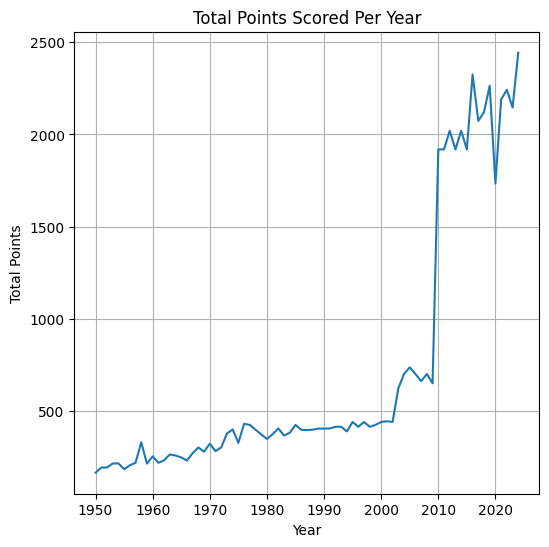

In [24]:
# Add total aggregate points line chart
yearly_points = f1_final.groupby(["year"])["total_points"].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.plot(yearly_points["year"], yearly_points["total_points"])
plt.title("Total Points Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

*Massive point inflation in 2010. So will try models again using 2010-2024 and including points data*

# Machine Learning Analysis (2010-2024)

*Random Forest the best model with accuracy of 0.7671 and F1 of 0.8045*

### Import Modules

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, r2_score, confusion_matrix

### Load Data

In [26]:
f1_final = pd.read_csv("../data/final/f1_final.csv", encoding="utf-8")
f1_final_2010 = f1_final[f1_final["year"] >= 2010]
f1_final_2010.head(3)

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
3146,2010,Sebastian Vettel,Red Bull,Europe,1,1.947368,1.352926,1,6,19,...,0.157895,0.526316,0.789474,-0.094318,0.305254,0.795114,4.052632,0.005913,2.081081,1
3147,2010,Fernando Alonso,Ferrari,Europe,2,5.789474,6.214490,1,24,19,...,0.263158,0.526316,0.842105,-0.003445,-0.073412,0.939816,-0.368421,0.006548,-0.063636,1
3148,2010,Mark Webber,Red Bull,Oceania,3,2.789474,1.843274,1,7,19,...,0.157895,0.526316,0.894737,-0.113055,0.339203,0.826582,3.263158,0.005939,1.169811,1


### Split Data

In [27]:
# Set X and y variables
X = f1_final_2010.drop(columns=["driver_retained", "year", "driver", "team_name", "continent", "total_laps_completed", "total_laps"]).values
y = f1_final_2010["driver_retained"].values

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model

In [28]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Results
print(f"Accuracy: {rf.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7671232876712328
F1: 0.8045977011494253
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        35
           1       0.71      0.92      0.80        38

    accuracy                           0.77        73
   macro avg       0.79      0.76      0.76        73
weighted avg       0.79      0.77      0.76        73



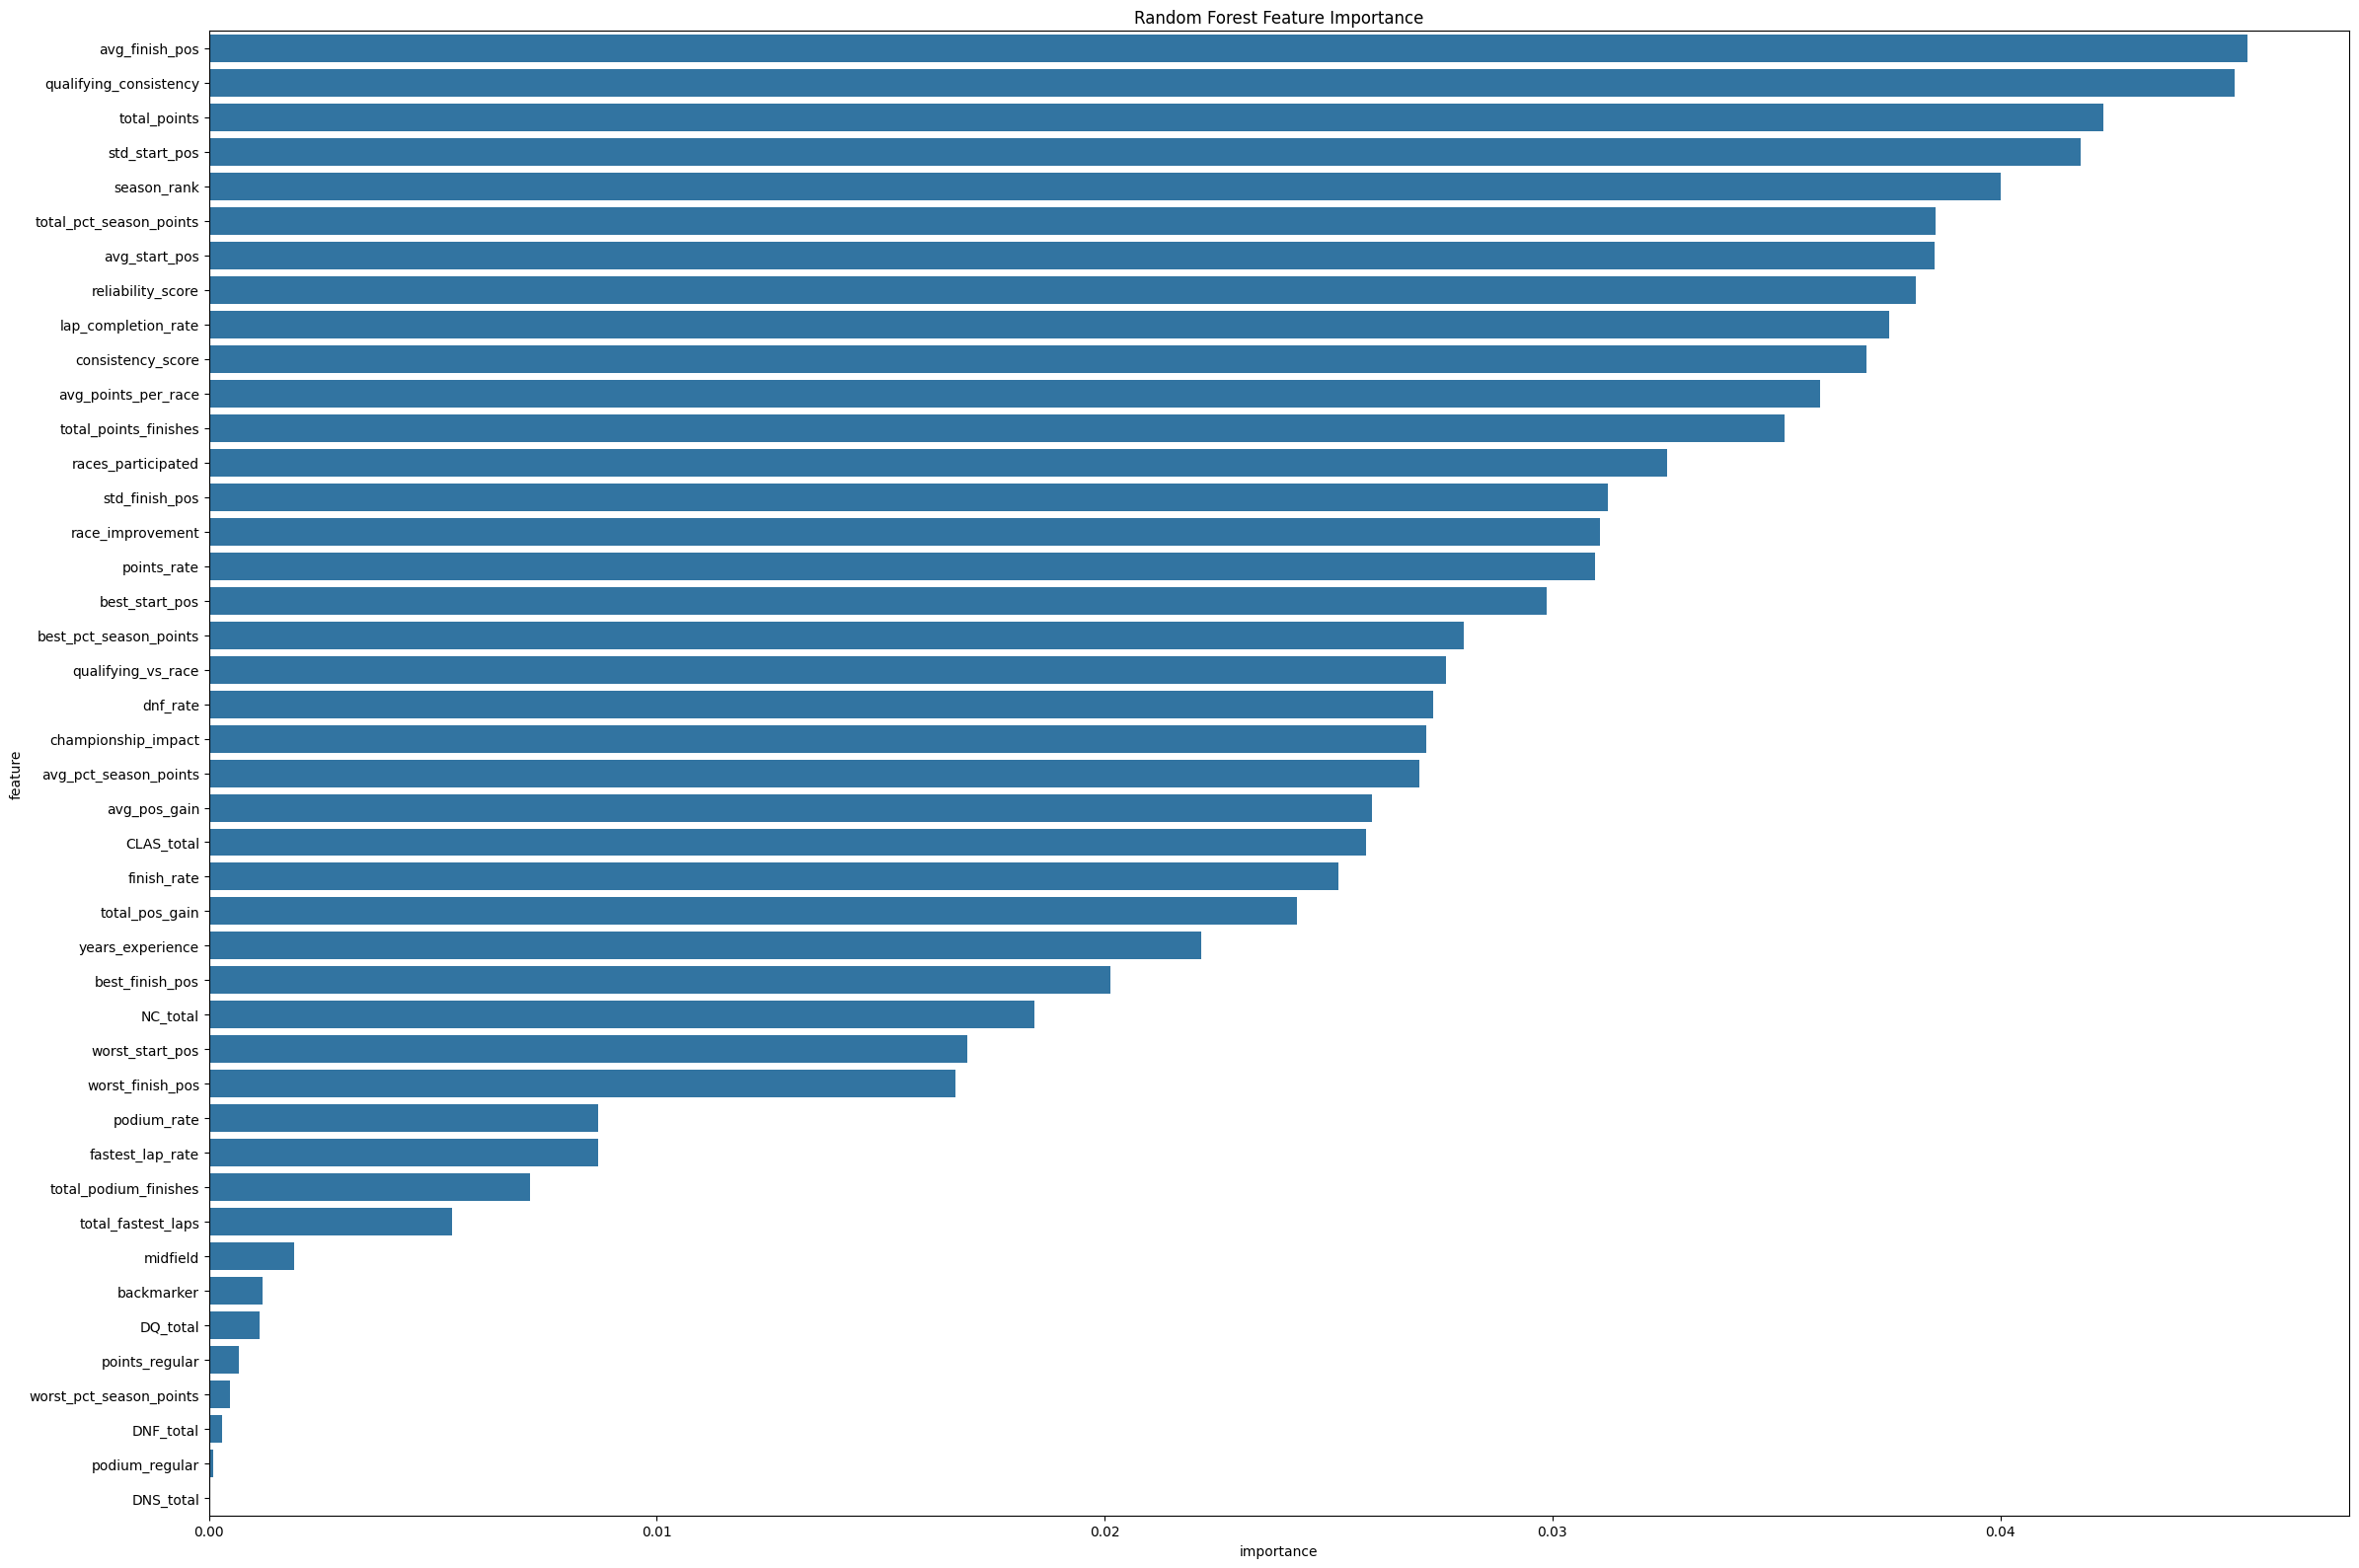

'Top 10 Most Important Features:'

,feature,importance
6,avg_finish_pos,0.045516
38,qualifying_consistency,0.045234
12,total_points,0.042304
2,std_start_pos,0.041801
0,season_rank,0.040010
14,total_pct_season_points,0.038554
1,avg_start_pos,0.038544
39,reliability_score,0.038123
33,lap_completion_rate,0.037511
37,consistency_score,0.037010


In [29]:
# Get feature importances
importances = rf.feature_importances_
feature_names = f1_final_2010.drop(columns=["driver_retained", "year", "driver", "team_name", "continent", "total_laps_completed", "total_laps"]).columns

# Create dataframe of feature importances
feature_importances = pd.DataFrame({"feature": feature_names, "importance": importances})

# Sort by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(24, 16))
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Display top features
display("Top 10 Most Important Features:")
display(feature_importances.head(10))

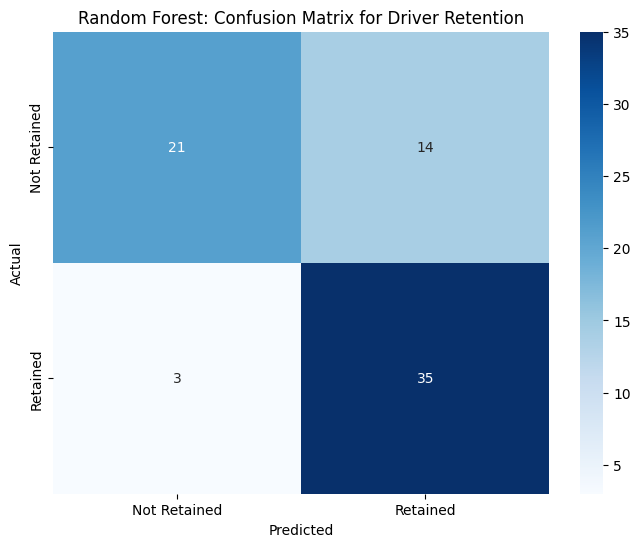

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Retained', 'Retained'],
            yticklabels=['Not Retained', 'Retained'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest: Confusion Matrix for Driver Retention')
plt.show()

### Decision Tree Model

In [31]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Fit data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Results
print(f"Accuracy: {dt.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6712328767123288
F1: 0.6756756756756757
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        35
           1       0.69      0.66      0.68        38

    accuracy                           0.67        73
   macro avg       0.67      0.67      0.67        73
weighted avg       0.67      0.67      0.67        73



### Logistic Regression

In [32]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)

# Fit data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Results
print(f"Accuracy: {log_reg.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.684931506849315
F1: 0.7160493827160493
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.67      0.76      0.72        38

    accuracy                           0.68        73
   macro avg       0.69      0.68      0.68        73
weighted avg       0.69      0.68      0.68        73



### Gradient Boosting Model

In [33]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Fit data
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Results
print(f"Accuracy: {gb.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6301369863013698
F1: 0.6896551724137931
              precision    recall  f1-score   support

           0       0.67      0.46      0.54        35
           1       0.61      0.79      0.69        38

    accuracy                           0.63        73
   macro avg       0.64      0.62      0.62        73
weighted avg       0.64      0.63      0.62        73



# Driver Dominance Analysis

## Import Modules

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Load Data

In [47]:
f1_final = pd.read_csv("../data/final/f1_final.csv", encoding="utf-8")
f1_final_2010 = f1_final[f1_final["year"] >= 2010]
display(f1_final.head(3))

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
0,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1,3,6,...,0.500000,0.500000,0.833333,-0.028586,0.589397,0.601023,2.500000,0.025720,1.363636,1
1,1950,Juan Manuel Fangio,Alfa Romeo,South America,2,2.500000,2.345208,1,7,6,...,0.333333,0.500000,0.500000,0.067262,0.061917,0.419437,4.166667,0.013374,1.666667,1
2,1950,Luigi Fagioli,Alfa Romeo,Europe,3,3.500000,1.224745,2,5,6,...,0.000000,0.833333,0.833333,0.014150,0.650073,0.620205,0.166667,0.024005,0.047619,1


## Top Drivers and Teams

Top 5 Drivers with Most Seasons:
driver
Lewis Hamilton      15
Daniel Ricciardo    14
Sergio Perez        14
Nico Hulkenberg     13
Sebastian Vettel    13
Name: year, dtype: int64

Top 3 Teams with Most Seasons:
team_name
Williams    15
McLaren     15
Ferrari     15
Name: year, dtype: int64


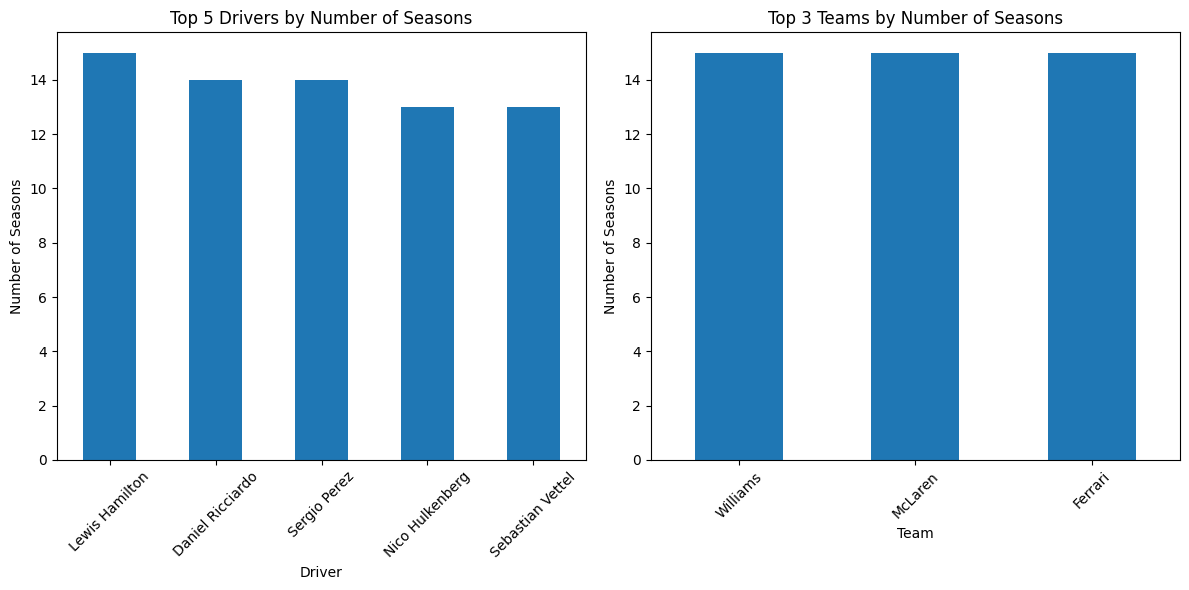

In [96]:
# Find top 5 drivers with most seasons
top_drivers = f1_final_2010.groupby("driver")["year"].nunique().sort_values(ascending=False).head(5)
print("Top 5 Drivers with Most Seasons:")
print(top_drivers)
print()

# Find top 3 teams with most seasons
top_teams = f1_final_2010.groupby("team_name")["year"].nunique().sort_values(ascending=False).head(3)
print("Top 3 Teams with Most Seasons:")
print(top_teams)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_drivers.plot(kind="bar")
plt.title("Top 5 Drivers by Number of Seasons")
plt.xlabel("Driver")
plt.ylabel("Number of Seasons")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_teams.plot(kind="bar")
plt.title("Top 3 Teams by Number of Seasons")
plt.xlabel("Team")
plt.ylabel("Number of Seasons")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Rankings Over Time

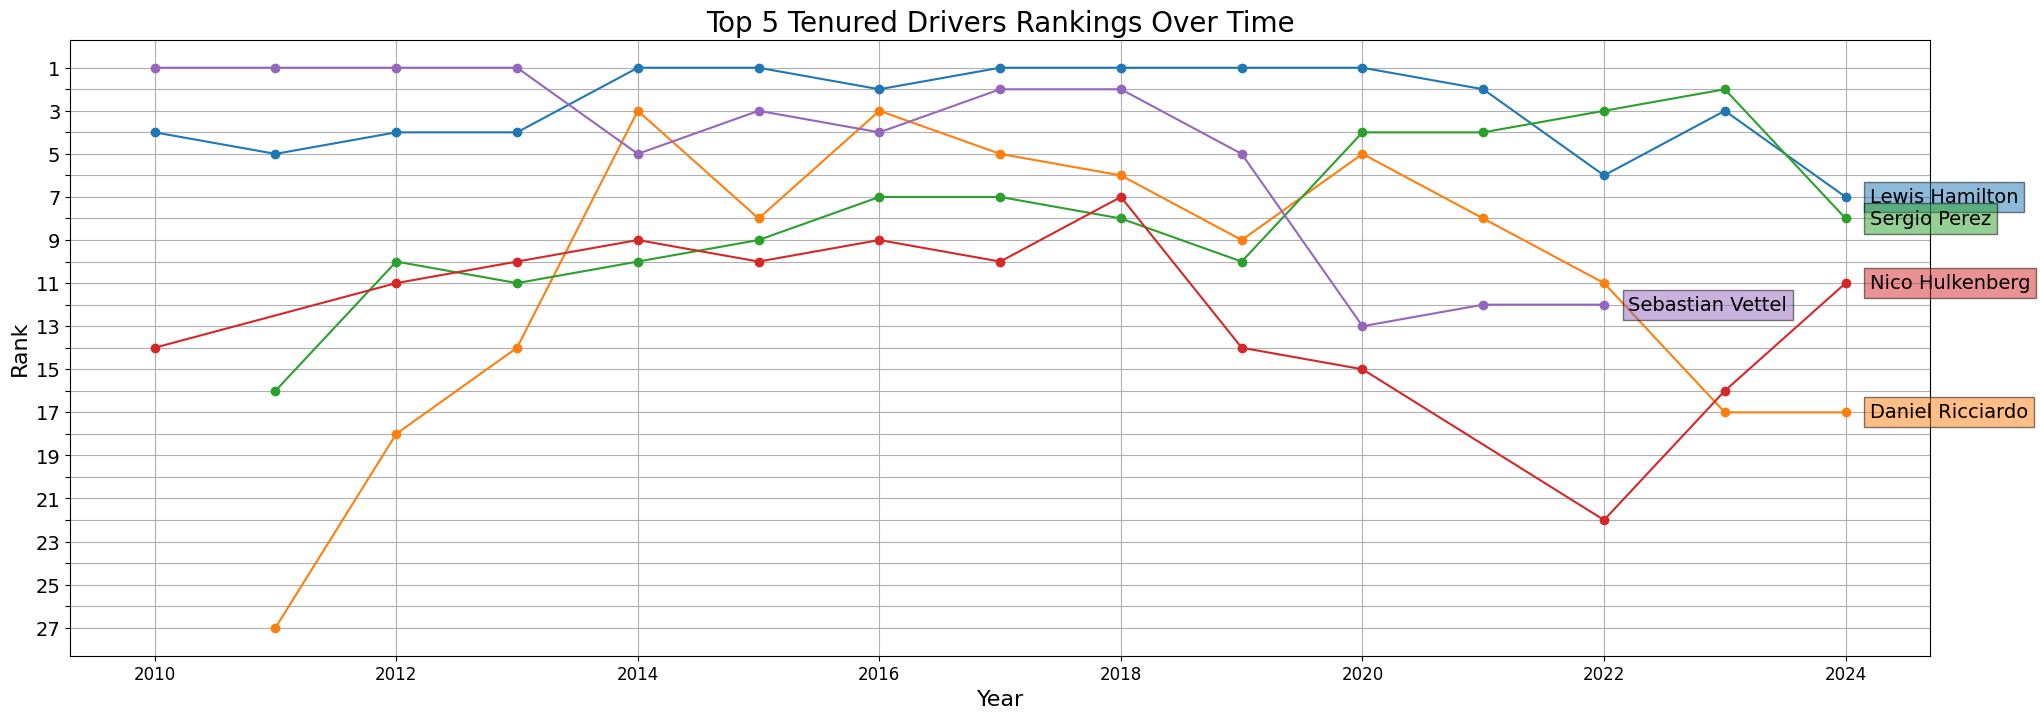

In [111]:
# Line chart of top teams rankings over time
plt.figure(figsize=(24, 8))

for driver in top_drivers.index:  # Use .index to get team names
    driver_data = f1_final_2010[f1_final_2010["driver"] == driver]
    line = plt.plot(driver_data["year"], driver_data["season_rank"], marker='o')
    # Add driver name annotation with colored box at the end of each line
    last_year = driver_data["year"].max()
    last_rank = driver_data[driver_data["year"] == last_year]["season_rank"].values[0]
    plt.text(last_year + 0.2, last_rank, driver, va='center', 
             bbox=dict(facecolor=line[0].get_color(), alpha=0.5, edgecolor='black'))

plt.gca().invert_yaxis()  # Invert y-axis so rank 1 is at the top
plt.title("Top 5 Tenured Drivers Rankings Over Time")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.grid(True)
plt.yticks(range(1, 28, 1))
plt.show()

## Correlation

In [48]:
# Correlation between driver rank and time
corr, p_value = pearsonr(f1_final_2010["season_rank"], f1_final_2010["year"])

print(f"Pearson Correlation between rank and year: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05)")
else:
    print("The correlation is not statistically significant (p >= 0.05)")


Pearson Correlation between rank and year: -0.103
P-value: 0.051
The correlation is not statistically significant (p >= 0.05)


# Continent Analysis

## Import Modules

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Load Data

In [78]:
f1_final = pd.read_csv("../data/final/f1_final.csv", encoding="utf-8")
f1_final_2010 = f1_final[f1_final["year"] >= 2010]
display(f1_final.head(3))

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
0,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1,3,6,...,0.500000,0.500000,0.833333,-0.028586,0.589397,0.601023,2.500000,0.025720,1.363636,1
1,1950,Juan Manuel Fangio,Alfa Romeo,South America,2,2.500000,2.345208,1,7,6,...,0.333333,0.500000,0.500000,0.067262,0.061917,0.419437,4.166667,0.013374,1.666667,1
2,1950,Luigi Fagioli,Alfa Romeo,Europe,3,3.500000,1.224745,2,5,6,...,0.000000,0.833333,0.833333,0.014150,0.650073,0.620205,0.166667,0.024005,0.047619,1


## Distribution

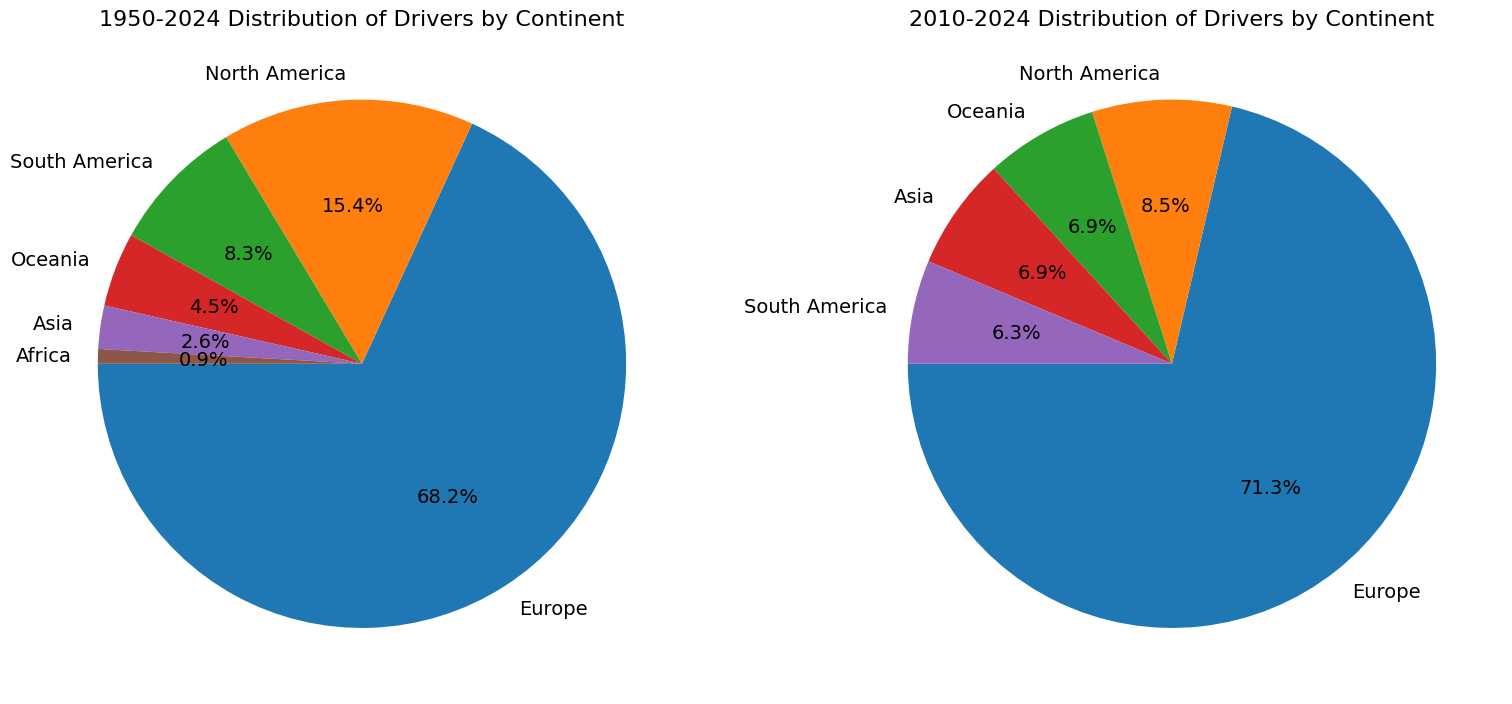

In [104]:
# Collect data
continent_counts = f1_final["continent"].value_counts()
continent_counts_2010 = f1_final_2010["continent"].value_counts()

# Plot continent distribution
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.pie(continent_counts, labels=continent_counts.index, autopct="%1.1f%%", startangle=180)
plt.title("1950-2024 Distribution of Drivers by Continent")

plt.subplot(1, 2, 2)
plt.pie(continent_counts_2010, labels=continent_counts_2010.index, autopct="%1.1f%%", startangle=180)
plt.title("2010-2024 Distribution of Drivers by Continent")

plt.tight_layout()
plt.show()

## Count

C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\2840708997.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_counts.index)
C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\2840708997.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_counts_2010.index)


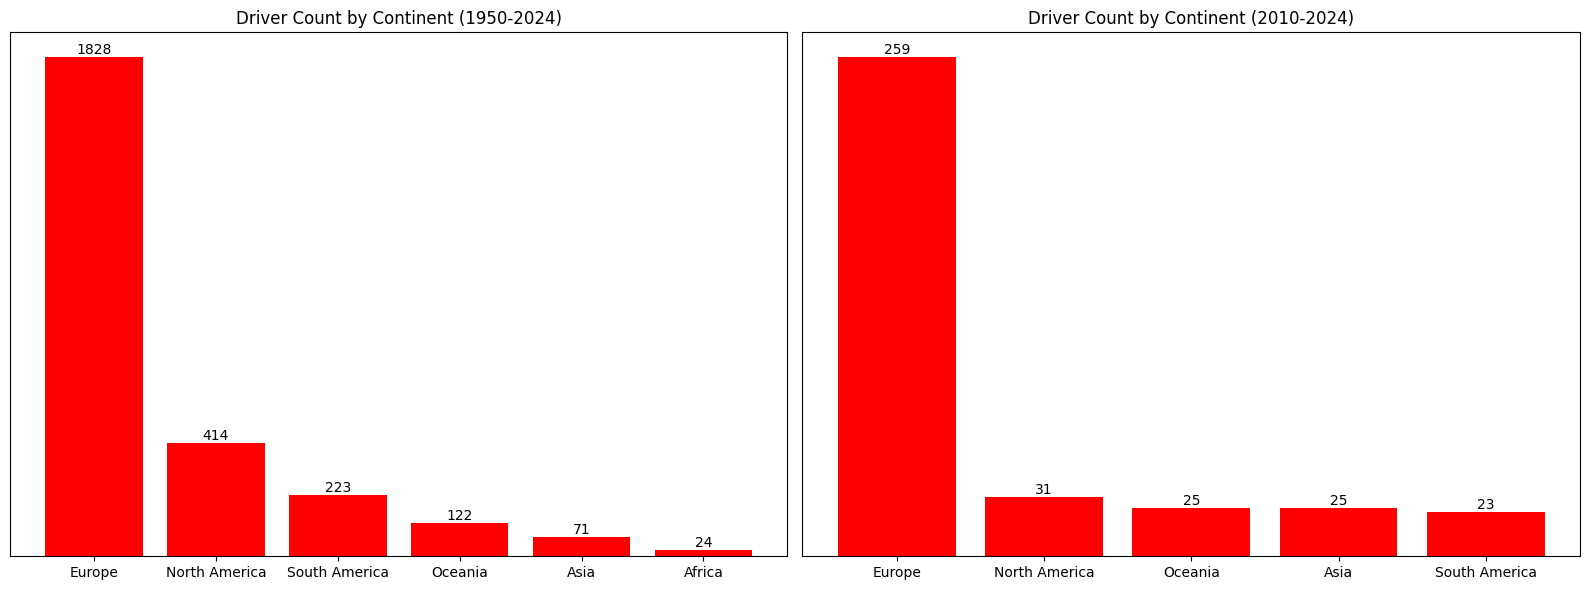

In [87]:
# Create figure and axes for bar charts
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for 1950-2024
ax = axs[0]
bars = ax.bar(continent_counts.index, continent_counts.values, color='red')
ax.set_title("Driver Count by Continent (1950-2024)")
ax.set_xticklabels(continent_counts.index)
ax.bar_label(bars, fmt="%.0f")
ax.set_yticks([])

# Bar chart for 2010-2024 
ax = axs[1]
bars = ax.bar(continent_counts_2010.index, continent_counts_2010.values, color='red')
ax.set_title("Driver Count by Continent (2010-2024)")
ax.set_xticklabels(continent_counts_2010.index)
ax.bar_label(bars, fmt="%.0f")
ax.set_yticks([])

plt.tight_layout()
plt.show()

## Performance

C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\3739838588.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_avg.index)
C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\3739838588.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_avg_2010.index)
C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\3739838588.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_avg.index)
C:\Users\jackw\AppData\Local\Temp\ipykernel_7212\3739838588.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(continent_avg_2010.index)


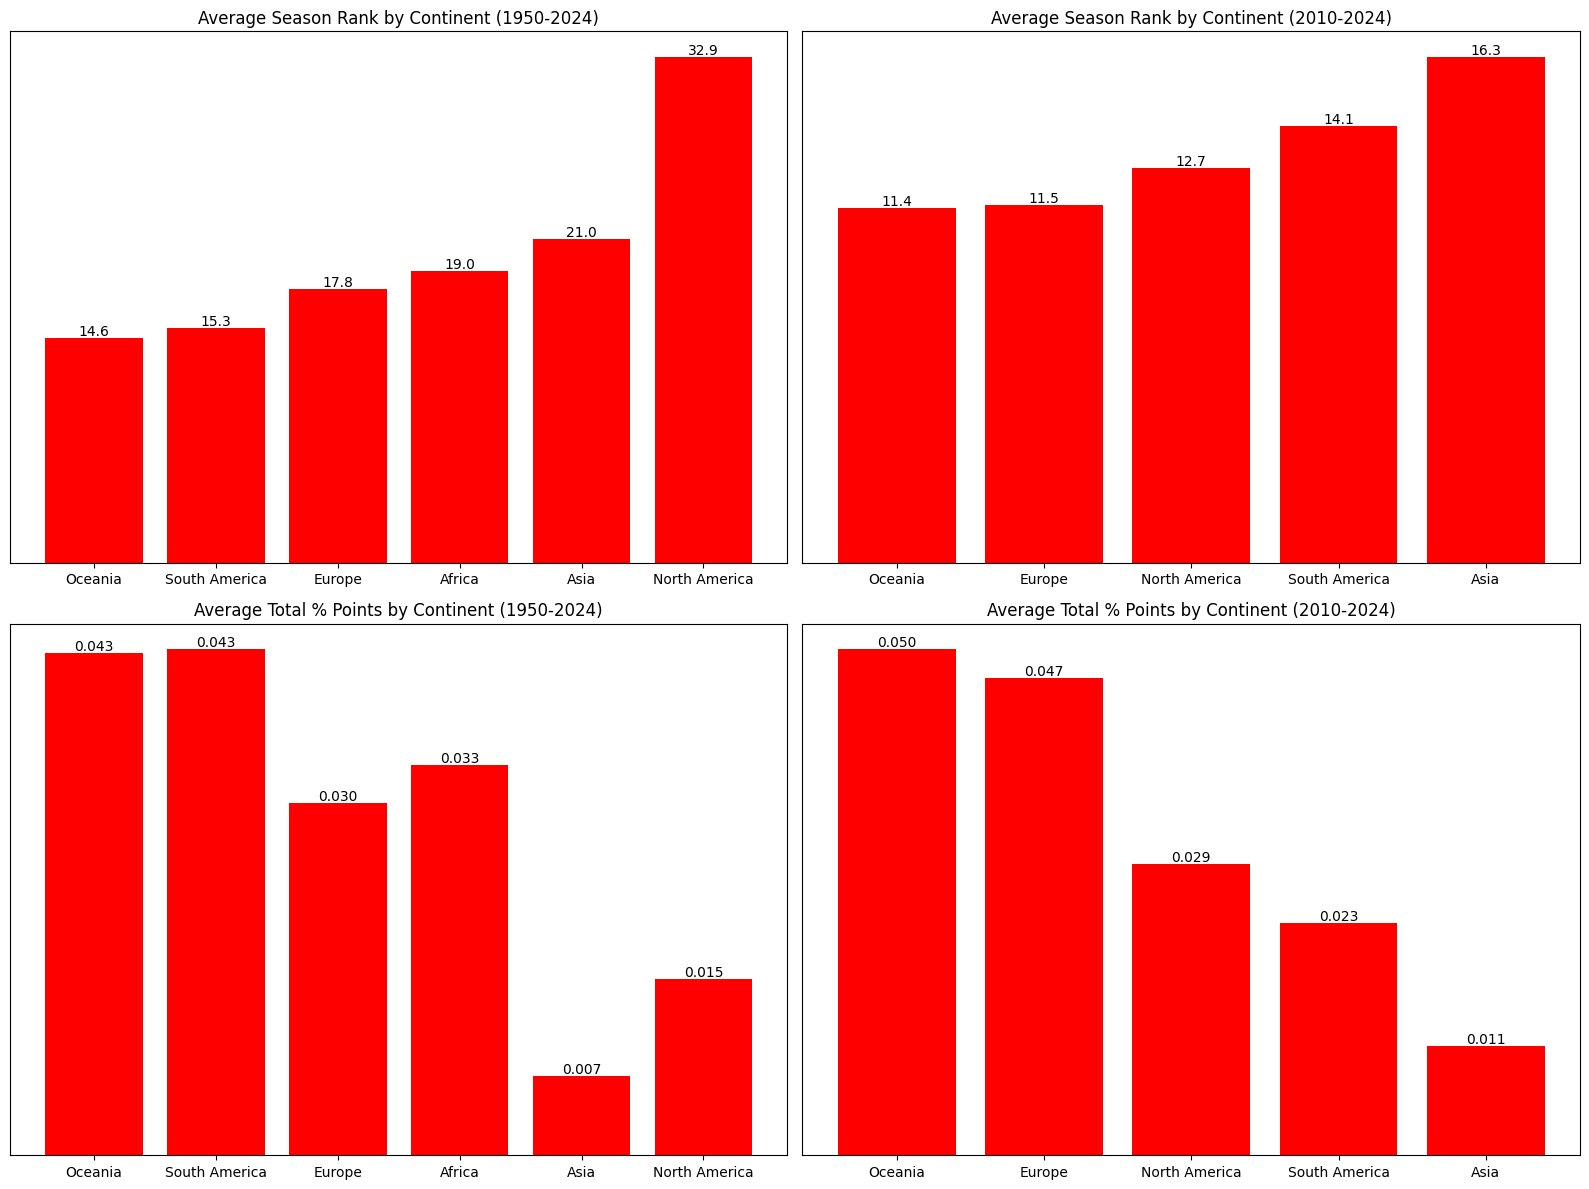

In [83]:
# Calculate average metrics by continent
continent_avg = f1_final.groupby("continent")[["season_rank", "total_pct_season_points"]].mean().sort_values("season_rank")
continent_avg_2010 = f1_final_2010.groupby("continent")[["season_rank", "total_pct_season_points"]].mean().sort_values("season_rank")

# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Avg Season Rank (1950–2024)
ax = axs[0, 0]
bars = ax.bar(continent_avg.index, continent_avg["season_rank"], color="red")
ax.set_title("Average Season Rank by Continent (1950-2024)")
ax.set_xticklabels(continent_avg.index)
ax.bar_label(bars, fmt="%.1f")
ax.set_yticks([])

# Avg Season Rank (2010–2024)
ax = axs[0, 1]
bars = ax.bar(continent_avg_2010.index, continent_avg_2010["season_rank"], color="red")
ax.set_title("Average Season Rank by Continent (2010-2024)")
ax.set_xticklabels(continent_avg_2010.index)
ax.bar_label(bars, fmt="%.1f")
ax.set_yticks([])

# Avg % Points (1950–2024)
ax = axs[1, 0]
bars = ax.bar(continent_avg.index, continent_avg["total_pct_season_points"], color="red")
ax.set_title("Average Total % Points by Continent (1950-2024)")
ax.set_xticklabels(continent_avg.index)
ax.bar_label(bars, fmt="%.3f")
ax.set_yticks([])

# Avg % Points (2010–2024)
ax = axs[1, 1]
bars = ax.bar(continent_avg_2010.index, continent_avg_2010["total_pct_season_points"], color="red")
ax.set_title("Average Total % Points by Continent (2010-2024)")
ax.set_xticklabels(continent_avg_2010.index)
ax.bar_label(bars, fmt="%.3f")
ax.set_yticks([])

plt.tight_layout()
plt.show()


# Age Analysis

## Import Modules

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Load Data

In [50]:
f1_final = pd.read_csv("../data/final/f1_final.csv", encoding="utf-8")
f1_final_2010 = f1_final[f1_final["year"] >= 2010]
display(f1_final.head(3))

,year,driver,team_name,continent,season_rank,avg_start_pos,std_start_pos,best_start_pos,worst_start_pos,races_participated,...,fastest_lap_rate,podium_rate,points_rate,consistency_score,qualifying_consistency,reliability_score,qualifying_vs_race,championship_impact,race_improvement,driver_retained
0,1950,Nino Farina,Alfa Romeo,Europe,1,1.833333,0.752773,1,3,6,...,0.500000,0.500000,0.833333,-0.028586,0.589397,0.601023,2.500000,0.025720,1.363636,1
1,1950,Juan Manuel Fangio,Alfa Romeo,South America,2,2.500000,2.345208,1,7,6,...,0.333333,0.500000,0.500000,0.067262,0.061917,0.419437,4.166667,0.013374,1.666667,1
2,1950,Luigi Fagioli,Alfa Romeo,Europe,3,3.500000,1.224745,2,5,6,...,0.000000,0.833333,0.833333,0.014150,0.650073,0.620205,0.166667,0.024005,0.047619,1


## Performance

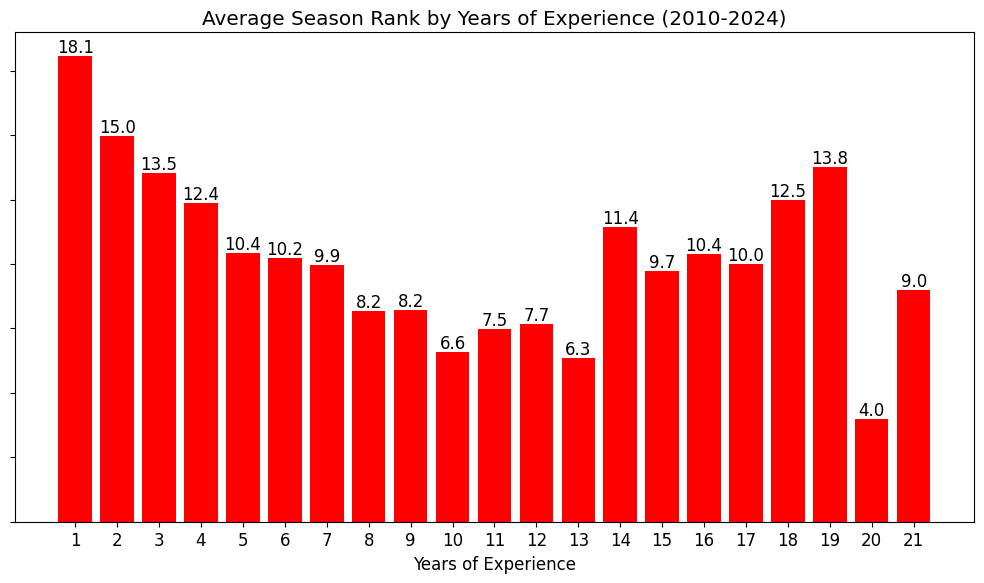

In [125]:
# Calculate average season rank by years of experience
exp_avg = f1_final_2010.groupby("years_experience")["season_rank"].mean().reset_index()

# Plot using fig and ax for better control
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(exp_avg["years_experience"], exp_avg["season_rank"], color='red')
ax.set_title("Average Season Rank by Years of Experience (2010-2024)")
ax.set_xlabel("Years of Experience")
ax.set_xticks(exp_avg["years_experience"])
ax.set_xticklabels(exp_avg["years_experience"])
ax.bar_label(bars, fmt="%.1f")
ax.set_yticklabels([])

plt.tight_layout()
plt.show()


## Correlation

Pearson correlation (experience vs rank): -0.378, p-value: 0.000
The correlation is statistically significant (p < 0.05)
Pearson correlation (experience vs points): 0.326, p-value: 0.000
The correlation is statistically significant (p < 0.05)


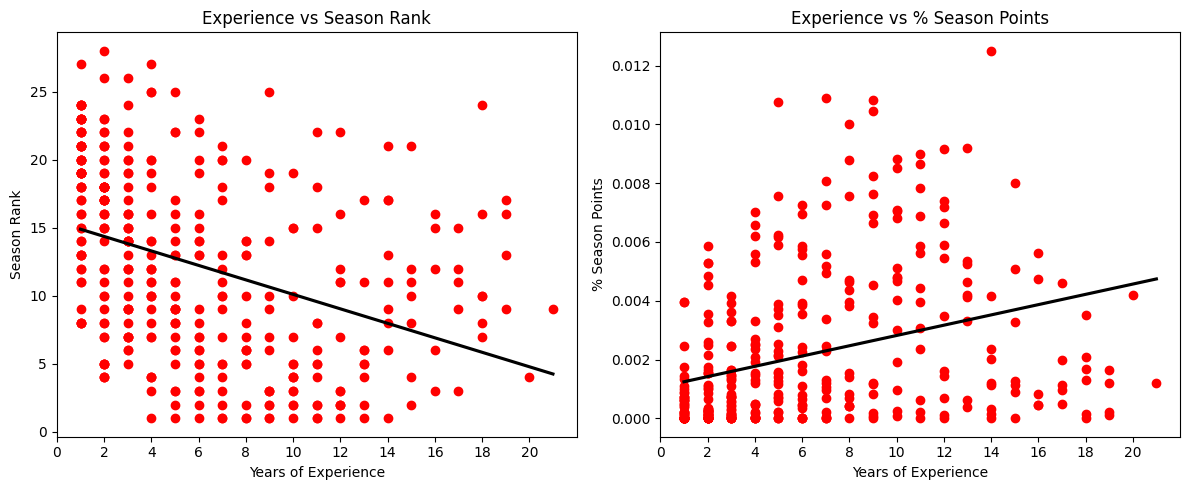

In [129]:
# Correlation between years of experience and season rank
corr_rank, p_rank = pearsonr(f1_final_2010["years_experience"], f1_final_2010["season_rank"])
print(f"Pearson correlation (experience vs rank): {corr_rank:.3f}, p-value: {p_rank:.3f}")

if p_rank < 0.05:
    print("The correlation is statistically significant (p < 0.05)")
else:
    print("The correlation is not statistically significant (p >= 0.05)")

# Correlation between years of experience and pct season points
corr_points, p_points = pearsonr(f1_final_2010["years_experience"], f1_final_2010["avg_pct_season_points"])
print(f"Pearson correlation (experience vs points): {corr_points:.3f}, p-value: {p_points:.3f}")

if p_points < 0.05:
    print("The correlation is statistically significant (p < 0.05)")
else:
    print("The correlation is not statistically significant (p >= 0.05)")

# Plot relationships with trend lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First plot with trend line
ax1.scatter(f1_final_2010["years_experience"], f1_final_2010["season_rank"], color="red")
sns.regplot(x=f1_final_2010["years_experience"], y=f1_final_2010["season_rank"], scatter=False, color='black', ax=ax1, ci=None)
ax1.set_title("Experience vs Season Rank")
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Season Rank")
ax1.set_xticks(range(0, int(f1_final_2010["years_experience"].max())+1, 2))

# Second plot with trend line
ax2.scatter(f1_final_2010["years_experience"], f1_final_2010["avg_pct_season_points"], color="red")
sns.regplot(x=f1_final_2010["years_experience"], y=f1_final_2010["avg_pct_season_points"], scatter=False, color='black', ax=ax2, ci=None)
ax2.set_title("Experience vs % Season Points")
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("% Season Points")
ax2.set_xticks(range(0, int(f1_final_2010["years_experience"].max())+1, 2))

plt.tight_layout()
plt.show()
